# PHASE 4 PROJECT - CHICAGO CAR CRASHES

## BUSINESS UNDERSTANDING
### Traffic accidents pose a significant challenge to public safety and urban planning, often leading to severe injuries, fatalities, and economic losses. Understanding the root causes of vehicle crashes is crucial for policymakers, urban planners, and traffic safety organizations. The City of Chicago provides extensive accident data, including details about the vehicles involved, road conditions, driver behavior, and environmental factors. Analyzing these factors can uncover hidden patterns contributing to accidents, enabling authorities to implement preventive measures such as better road infrastructure, improved traffic regulations, and targeted awareness campaigns.

### By leveraging machine learning techniques, we aim to develop a predictive model that not only forecasts accident causes but also offers interpretability, allowing stakeholders to understand the key variables influencing crash occurrences. This project aligns with broader urban safety initiatives, ultimately contributing to the reduction of traffic-related fatalities and injuries.

## PROBLEM STATEMENT
### The primary goal of this project is to develop an interpretable machine learning model that predicts the leading cause of vehicle crashes based on a variety of factors such as driver characteristics, road conditions, and vehicle attributes. Traffic accidents are caused by multiple interacting variables, including reckless driving, adverse weather, poor road infrastructure, and mechanical failures. While traditional statistical analyses provide some insights, a machine learning approach enables the discovery of complex, non-linear relationships within the data. However, predictive power alone is insufficient—model interpretability is essential for decision-makers who require clear explanations for policy implementation. 
### The insights gained will help authorities take proactive measures, such as modifying road regulations, enhancing driver training programs, or enforcing stricter vehicle safety standards. By translating data-driven insights into actionable strategies, this study aims to contribute to safer roadways and more effective traffic management policies.

## OBJECTIVES
### **The main objectives of this data analysis project is to:**
### * Develop a machine learning model that predicts the primary contributory cause of vehicle accidents with reasonable accuracy.
### * Identify the most significant factors influencing crashes, such as driver behavior, road conditions, weather, and vehicle attributes.
### * Determine which variables contribute most to accidents, such as reckless driving, speeding, distracted driving, or poor road conditions.


## DATA UNDERSTANDING
### The dataset for this project comes from the City of Chicago and includes multiple sources such as crash reports, vehicle data, and driver/passenger details. It contains structured records of vehicle accidents, capturing critical variables like date, time, location, road conditions, weather conditions, driver behavior, and vehicle characteristics. Each accident is labeled with a primary contributory cause, which serves as the target variable for the predictive model. The dataset likely consists of both numerical and categorical variables, requiring careful preprocessing. For instance, categorical variables such as road surface type and driver actions must be encoded appropriately, while numerical features like speed and weather conditions may require normalization or transformation. Additionally, missing values, duplicate records, and class imbalances need to be addressed to ensure a reliable model. Exploratory data analysis (EDA) will be conducted to uncover correlations, distributions, and potential biases. Understanding these factors is crucial, as they influence not only the model’s predictive power but also its interpretability, ensuring that insights generated can effectively guide traffic safety policies.

## DATA PREPARATION
## Importing of Libraries

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc, r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix

## Reading data from the data sources

In [163]:
people_crashdf = pd.read_csv('Traffic_Crashes_People.csv')

people_crashdf.head()


c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (19,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,SEX,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,M,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [164]:
people_crashdf.info()
print(people_crashdf.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013685 entries, 0 to 2013684
Data columns (total 29 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   PERSON_ID              object 
 1   PERSON_TYPE            object 
 2   CRASH_RECORD_ID        object 
 3   VEHICLE_ID             float64
 4   CRASH_DATE             object 
 5   SEAT_NO                float64
 6   CITY                   object 
 7   STATE                  object 
 8   ZIPCODE                object 
 9   SEX                    object 
 10  AGE                    float64
 11  DRIVERS_LICENSE_STATE  object 
 12  DRIVERS_LICENSE_CLASS  object 
 13  SAFETY_EQUIPMENT       object 
 14  AIRBAG_DEPLOYED        object 
 15  EJECTION               object 
 16  INJURY_CLASSIFICATION  object 
 17  HOSPITAL               object 
 18  EMS_AGENCY             object 
 19  EMS_RUN_NO             object 
 20  DRIVER_ACTION          object 
 21  DRIVER_VISION          object 
 22  PHYSICAL_CONDITION

#### This dataset has 29 columns and 2,013,685 rows. These columns contain the information of the people who are involved in the crashes. 

In [165]:
vehicle_crashdf = pd.read_csv('Traffic_Crashes_Vehicles.csv')

vehicle_crashdf.head()

c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (20,39,40,41,43,47,48,49,52,54,57,58,60,70) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CRASH_UNIT_ID,CRASH_RECORD_ID,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,MODEL,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,10,2e31858c0e411f0bdcb337fb7c415aa93763cf2f23e02f...,08/04/2015 12:40:00 PM,1,DRIVER,NaN,10.0,NaN,FORD,Focus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100,e73b35bd7651b0c6693162bee0666db159b28901437009...,07/31/2015 05:50:00 PM,1,DRIVER,NaN,96.0,NaN,NISSAN,Pathfinder,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000,f2b1adeb85a15112e4fb7db74bff440d6ca53ff7a21e10...,09/02/2015 11:45:00 AM,1,DRIVER,NaN,954.0,NaN,FORD,F150,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10000,15a3e24fce3ce7cd2b02d44013d1a93ff2fbdca80632ec...,10/31/2015 09:30:00 PM,2,DRIVER,NaN,9561.0,NaN,HYUNDAI,SONATA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100000,1d3c178880366c77deaf06b8c3198429112a1c8e8807ed...,11/16/2016 01:00:00 PM,2,PARKED,NaN,96745.0,NaN,"TOYOTA MOTOR COMPANY, LTD.",RAV4 (sport utility),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
vehicle_crashdf.info()
print(vehicle_crashdf.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1870609 entries, 0 to 1870608
Data columns (total 71 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   CRASH_UNIT_ID             int64  
 1   CRASH_RECORD_ID           object 
 2   CRASH_DATE                object 
 3   UNIT_NO                   int64  
 4   UNIT_TYPE                 object 
 5   NUM_PASSENGERS            float64
 6   VEHICLE_ID                float64
 7   CMRC_VEH_I                object 
 8   MAKE                      object 
 9   MODEL                     object 
 10  LIC_PLATE_STATE           object 
 11  VEHICLE_YEAR              float64
 12  VEHICLE_DEFECT            object 
 13  VEHICLE_TYPE              object 
 14  VEHICLE_USE               object 
 15  TRAVEL_DIRECTION          object 
 16  MANEUVER                  object 
 17  TOWED_I                   object 
 18  FIRE_I                    object 
 19  OCCUPANT_CNT              float64
 20  EXCEED_SPEED_LIMIT_I    

#### This dataset has 71 columns and 1,870,609 rows and it seems that the information in the columns is records of the vehicles involved in the crashes.

In [167]:
crashesdf = pd.read_csv("Traffic_Crashes.csv")
crashesdf.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,00a530520c84927490b597a6220ff3f2a3347472ef3086...,NaN,01/15/2025 01:50:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,RAMP,...,0.0,0.0,1.0,0.0,13,4,1,41.816073,-87.656743,POINT (-87.656742699936 41.816073475493)
1,204c3ca48ff3cdf0737e7f10b54ef5f8c49fbe30b5e53e...,NaN,12/04/2024 05:39:00 PM,30,UNKNOWN,UNKNOWN,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,...,0.0,0.0,2.0,0.0,17,4,12,NaN,NaN,NaN
2,0173d218723a1d608d77b7142ca9b9a4afd7463e824162...,Y,09/23/2023 10:39:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,NOT DIVIDED,...,0.0,0.0,1.0,0.0,10,7,9,42.010386,-87.670011,POINT (-87.67001097385 42.010385766289)
3,26205ab4bcce4f6c3751a4947c94e5ad28b0dc0738cb27...,NaN,12/22/2019 08:11:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,2.0,0.0,20,1,12,41.715805,-87.643208,POINT (-87.643208253244 41.715804770128)
4,262653b489eadfd76fb48900ea9a48717357c1fdc9dbb8...,NaN,07/01/2023 02:00:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,3.0,0.0,14,7,7,41.736587,-87.625599,POINT (-87.625599334506 41.736586782204)


In [168]:
crashesdf.info()
print(crashesdf.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917353 entries, 0 to 917352
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                917353 non-null  object 
 1   CRASH_DATE_EST_I               67592 non-null   object 
 2   CRASH_DATE                     917353 non-null  object 
 3   POSTED_SPEED_LIMIT             917353 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         917353 non-null  object 
 5   DEVICE_CONDITION               917353 non-null  object 
 6   WEATHER_CONDITION              917353 non-null  object 
 7   LIGHTING_CONDITION             917353 non-null  object 
 8   FIRST_CRASH_TYPE               917353 non-null  object 
 9   TRAFFICWAY_TYPE                917353 non-null  object 
 10  LANE_CNT                       199023 non-null  float64
 11  ALIGNMENT                      917353 non-null  object 
 12  ROADWAY_SURFACE_COND          

#### This is a fairly smaller dataset than the other two datasets. It has about 48 columns and 917,353 rows of data. 

#### The Dataset is so huge with so many columns that may not be relevant and They sould be dropped. I will begin with Identifying those columns I find essential in this analysis and the drop the rest.

In [169]:
people_relevant_columns = ["CRASH_RECORD_ID","PERSON_ID","VEHICLE_ID","PERSON_TYPE","AGE","SEX","AIRBAG_DEPLOYED","EJECTION","INJURY_CLASSIFICATION",
                    "SAFETY_EQUIPMENT","DRIVER_ACTION","DRIVER_VISION"]
people_crashdf = people_crashdf[people_relevant_columns]
people_crashdf.head()

,CRASH_RECORD_ID,PERSON_ID,VEHICLE_ID,PERSON_TYPE,AGE,SEX,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,SAFETY_EQUIPMENT,DRIVER_ACTION,DRIVER_VISION
0,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,O749947,834816.0,DRIVER,25.0,M,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,NONE PRESENT,UNKNOWN,UNKNOWN
1,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,O871921,827212.0,DRIVER,37.0,M,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,SAFETY BELT USED,NONE,NOT OBSCURED
2,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,O10018,9579.0,DRIVER,NaN,X,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,USAGE UNKNOWN,IMPROPER BACKING,UNKNOWN
3,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,O10038,9598.0,DRIVER,NaN,X,DEPLOYMENT UNKNOWN,UNKNOWN,NO INDICATION OF INJURY,USAGE UNKNOWN,UNKNOWN,UNKNOWN
4,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,O10039,9600.0,DRIVER,NaN,X,DEPLOYMENT UNKNOWN,UNKNOWN,NO INDICATION OF INJURY,USAGE UNKNOWN,UNKNOWN,UNKNOWN


In [170]:
vehicle_relevant_columns = ["CRASH_RECORD_ID","VEHICLE_ID","CRASH_DATE","MAKE","MODEL","VEHICLE_YEAR","VEHICLE_TYPE",
                            "TRAVEL_DIRECTION","VEHICLE_DEFECT","VEHICLE_USE","MANEUVER","UNIT_TYPE","OCCUPANT_CNT",
                            "EXCEED_SPEED_LIMIT_I"]

vehicle_crashdf = vehicle_crashdf[vehicle_relevant_columns]
vehicle_crashdf.head(20)

,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE,MAKE,MODEL,VEHICLE_YEAR,VEHICLE_TYPE,TRAVEL_DIRECTION,VEHICLE_DEFECT,VEHICLE_USE,MANEUVER,UNIT_TYPE,OCCUPANT_CNT,EXCEED_SPEED_LIMIT_I
0,2e31858c0e411f0bdcb337fb7c415aa93763cf2f23e02f...,10.0,08/04/2015 12:40:00 PM,FORD,Focus,2001.0,PASSENGER,N,NONE,PERSONAL,TURNING LEFT,DRIVER,1.0,NaN
1,e73b35bd7651b0c6693162bee0666db159b28901437009...,96.0,07/31/2015 05:50:00 PM,NISSAN,Pathfinder,1999.0,SPORT UTILITY VEHICLE (SUV),E,NONE,PERSONAL,STRAIGHT AHEAD,DRIVER,1.0,NaN
2,f2b1adeb85a15112e4fb7db74bff440d6ca53ff7a21e10...,954.0,09/02/2015 11:45:00 AM,FORD,F150,NaN,VAN/MINI-VAN,W,UNKNOWN,UNKNOWN/NA,STRAIGHT AHEAD,DRIVER,1.0,NaN
3,15a3e24fce3ce7cd2b02d44013d1a93ff2fbdca80632ec...,9561.0,10/31/2015 09:30:00 PM,HYUNDAI,SONATA,2011.0,PASSENGER,E,NONE,PERSONAL,SLOW/STOP IN TRAFFIC,DRIVER,1.0,NaN
4,1d3c178880366c77deaf06b8c3198429112a1c8e8807ed...,96745.0,11/16/2016 01:00:00 PM,"TOYOTA MOTOR COMPANY, LTD.",RAV4 (sport utility),2001.0,SPORT UTILITY VEHICLE (SUV),S,UNKNOWN,NOT IN USE,PARKED,PARKED,0.0,NaN
5,57945047eb951f4152fde013708fa029caf5d33fc2a2c2...,947651.0,11/25/2020 05:46:00 PM,DODGE,OTHER (EXPLAIN IN NARRATIVE),NaN,PICKUP,N,UNKNOWN,UNKNOWN/NA,SKIDDING/CONTROL LOSS,DRIVER,1.0,NaN
6,57945047eb951f4152fde013708fa029caf5d33fc2a2c2...,947660.0,11/25/2020 05:46:00 PM,SUBARU,FORESTER,2020.0,PASSENGER,S,UNKNOWN,PERSONAL,STRAIGHT AHEAD,DRIVER,2.0,NaN
7,7cf1e0da7413f35c258ad67a3f0d08b10c9cf94a59bb4e...,947657.0,11/25/2020 06:39:00 PM,HONDA,CIVIC,2017.0,PASSENGER,S,UNKNOWN,UNKNOWN/NA,UNKNOWN/NA,DRIVER,1.0,NaN
8,7cf1e0da7413f35c258ad67a3f0d08b10c9cf94a59bb4e...,947665.0,11/25/2020 06:39:00 PM,FORD,FOCUS,2020.0,PASSENGER,S,UNKNOWN,PERSONAL,PARKED,PARKED,0.0,NaN
9,7cf1e0da7413f35c258ad67a3f0d08b10c9cf94a59bb4e...,947670.0,11/25/2020 06:39:00 PM,SUBARU,FORESTER,2017.0,SPORT UTILITY VEHICLE (SUV),S,UNKNOWN,PERSONAL,UNKNOWN/NA,DRIVER,1.0,NaN


In [171]:
crashes_relevant_columns = ["CRASH_RECORD_ID","CRASH_DATE","CRASH_DATE_EST_I","POSTED_SPEED_LIMIT","TRAFFICWAY_TYPE",
                            "ALIGNMENT","ROADWAY_SURFACE_COND","ROAD_DEFECT","LIGHTING_CONDITION","WEATHER_CONDITION",
                            "FIRST_CRASH_TYPE","TRAFFIC_CONTROL_DEVICE","DEVICE_CONDITION","PRIM_CONTRIBUTORY_CAUSE","SEC_CONTRIBUTORY_CAUSE"]

crashdf = crashesdf[crashes_relevant_columns]
crashdf.head()

,CRASH_RECORD_ID,CRASH_DATE,CRASH_DATE_EST_I,POSTED_SPEED_LIMIT,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,LIGHTING_CONDITION,WEATHER_CONDITION,FIRST_CRASH_TYPE,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE
0,00a530520c84927490b597a6220ff3f2a3347472ef3086...,01/15/2025 01:50:00 PM,NaN,30,RAMP,STRAIGHT AND LEVEL,DRY,NO DEFECTS,DAYLIGHT,CLEAR,FIXED OBJECT,NO CONTROLS,NO CONTROLS,UNABLE TO DETERMINE,NOT APPLICABLE
1,204c3ca48ff3cdf0737e7f10b54ef5f8c49fbe30b5e53e...,12/04/2024 05:39:00 PM,NaN,30,NOT DIVIDED,STRAIGHT AND LEVEL,WET,UNKNOWN,"DARKNESS, LIGHTED ROAD",RAIN,TURNING,UNKNOWN,UNKNOWN,FOLLOWING TOO CLOSELY,FAILING TO YIELD RIGHT-OF-WAY
2,0173d218723a1d608d77b7142ca9b9a4afd7463e824162...,09/23/2023 10:39:00 AM,Y,30,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,NO DEFECTS,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,UNABLE TO DETERMINE,UNABLE TO DETERMINE
3,26205ab4bcce4f6c3751a4947c94e5ad28b0dc0738cb27...,12/22/2019 08:11:00 PM,NaN,30,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,"DARKNESS, LIGHTED ROAD",CLEAR,REAR END,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,UNABLE TO DETERMINE,UNABLE TO DETERMINE
4,262653b489eadfd76fb48900ea9a48717357c1fdc9dbb8...,07/01/2023 02:00:00 PM,NaN,30,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,DAYLIGHT,CLEAR,REAR END,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,UNABLE TO DETERMINE,NOT APPLICABLE


#### Now that we have all the columns we consider necessary in the prediction modele training andd development we can go ahead and start cleaning the data.

## Data Cleaning and Pre-Processing

### The first step is inspecting and identifying the unique values in each column

In [172]:
# Checking for the value cont of each unique value in the peoplle_crashdf dataframe
for column in people_crashdf.columns:
    print(column, '\n')
    print(people_crashdf[column].value_counts())
    print('_________')
    print('_________')

CRASH_RECORD_ID 

31ecf6862c691ff12d3856213b902c146b07337b42a5692e3a176a66d684d221028bb5118ef6d67a313bcaed9e97bee1855cb1f5e8650f49e8dc17663475a1ee    61
64d6480b38e77266a4d16717d0049f9df21075fa2dbf015cbbc83e59f019e6a69d3628ae1e4a9a70ec5dbf435fbdcd3b979cab5c991af14c08509f4c337f4a3d    54
13026c7fb51566d9ca487a093e38c6f5621c2ec25be48c306b6574983b61daeee589524b96bb2bfe66ddd0f695c8d2bf3ab0297558528e9c7a70363c763d6bd1    50
3eda323ea45cd6e2b459bf5ba570dcf74e71f3fe1aa449231a47fd1dd20ce71de888840d420dc54b61ca643159b46494979dad05e407d8138438a675c615575d    48
1829f52c1281a0396ef94692331b3dc530bc4be5a54cd55e94c24a5e5e49b800fbcf9f24dabe4c8277c8964ad05aadc89e90fd94021959d6dff5fad55480d595    46
                                                                                                                                    ..
662e8159b65fdb4568597d667a74286fbf32e09dc5d1b181b835e55daaf8f35957cecd7945b26e3c464d92ee7664c3965b8ad6961d4e50742903deb857a617c2     1
12c9425d283af30d5b224b64a7d8655d2249c

In [173]:
people_crashdf.isnull().sum()

CRASH_RECORD_ID               0
PERSON_ID                     0
VEHICLE_ID                41314
PERSON_TYPE                   0
AGE                      585808
SEX                       34025
AIRBAG_DEPLOYED           39761
EJECTION                  25395
INJURY_CLASSIFICATION       759
SAFETY_EQUIPMENT           5630
DRIVER_ACTION            410508
DRIVER_VISION            411155
dtype: int64

### Dropping NULL values

In [174]:
# Count the number of null values in each column
null_counts = people_crashdf.isna().sum()

# Calculate the percentage of null values
null_percentage = (null_counts / len(people_crashdf)) * 100

# Display null value percentage for each column
print(null_percentage)


CRASH_RECORD_ID           0.000000
PERSON_ID                 0.000000
VEHICLE_ID                2.051662
PERSON_TYPE               0.000000
AGE                      29.091342
SEX                       1.689688
AIRBAG_DEPLOYED           1.974539
EJECTION                  1.261121
INJURY_CLASSIFICATION     0.037692
SAFETY_EQUIPMENT          0.279587
DRIVER_ACTION            20.385909
DRIVER_VISION            20.418040
dtype: float64


### The first process is dropping null values from the column Vehicle_ID since we want to predict car accidents.

In [175]:
# Check for null values in 'PERSON_ID'
print(f"Number of null values in PERSON_ID: {people_crashdf['PERSON_ID'].isnull().sum()}")

Number of null values in PERSON_ID: 0


#### In this column our unique values are in the PERSON_ID we can verify if there are any null values. Since there are none we should also check for null values  in the VEHICLE_ID column. Eliminating these null values will ensure we are left with data about people who are directly involved with the vehicles.

In [176]:
#Check for null VEHICLE_ID:
print(f"Number of null values in VEHICLE_ID: {people_crashdf['VEHICLE_ID'].isnull().sum()}")

Number of null values in VEHICLE_ID: 41314


In [177]:
#Drop rows with null VEHICLE_ID values
people_crashdf = people_crashdf.dropna(subset = ['VEHICLE_ID'])

In [178]:
print(f"Number of null values in VEHICLE_ID after dropping: {people_crashdf['VEHICLE_ID'].isnull().sum()}")

Number of null values in VEHICLE_ID after dropping: 0


In [179]:
print(f"Original shape: {people_crashdf.shape}")

Original shape: (1972371, 12)


#### Since there is no null value in the PERSON_TYPE column, dropping all value with "NON-CONTACT VEHICLE" and "PASSENGER" is essential as they are very small and may not affect the outcome of the models made. We also want to focus on the the "DRIVER" person as they may offer more decisive models.

In [180]:
print(people_crashdf["PERSON_TYPE"].value_counts(normalize=True) * 100)


DRIVER                 79.360120
PASSENGER              20.630348
NON-CONTACT VEHICLE     0.009532
Name: PERSON_TYPE, dtype: float64


In [181]:
people_crashdf = people_crashdf[people_crashdf["PERSON_TYPE"] != "NON-CONTACT VEHICLE"]
people_crashdf = people_crashdf[people_crashdf["PERSON_TYPE"] != "PASSENGER"]
print(people_crashdf["PERSON_TYPE"].value_counts())  

DRIVER    1565276
Name: PERSON_TYPE, dtype: int64


### The age column could be important column and we might need to check for how our data is distributed accross the age. Value lower than 16 (least legal drivng age) and higher than 79 (Oldest legal driving Age) should be modified.

In [182]:
print(f"Number of null values in AGE: {people_crashdf['AGE'].isnull().sum()} While the total number of value in the AGE column is {people_crashdf['AGE'].shape[0]}")

Number of null values in AGE: 421345 While the total number of value in the AGE column is 1565276


In [183]:
count = ((people_crashdf["AGE"] > 79) | (people_crashdf["AGE"] < 16)).sum()
print(f"Count: {count}")


Count: 22804


In [184]:
null_counts = people_crashdf.groupby("PERSON_TYPE")["AGE"].apply(lambda x: x.isnull().sum())
percentage_null_counts = ((null_counts + count)/people_crashdf["PERSON_TYPE"].value_counts())*100
print(null_counts,percentage_null_counts)

PERSON_TYPE
DRIVER    421345
Name: AGE, dtype: int64 PERSON_TYPE
DRIVER    28.375124
dtype: float64


#### The percentage of null values and all the values of the drivers ages that is below 16 and above 79 years is about 28% which is a significant number so it is best to categorize the data. This will hel use reduce dimensionality.

In [185]:
people_crashdf["AGE"] = people_crashdf["AGE"].fillna(0).astype("int64")

#### After turning our null values to zero we can now derive a new column "DRIVER_CATEGORY" that makes more sence in our prediction and then we can get rin of the columns "AGE" and "PERSON_TYPE".

In [186]:
def categorize_driver(age):
    if 16 <= age <= 20:
        return "TEEN DRIVER"
    elif 21 <= age <= 35:
        return "YOUNG ADULT"
    elif 36 <= age <= 55:
        return "MIDDLE-AGED ADULT"
    elif 56 <= age <= 79:
        return "SENIOR DRIVER"
    else:
        return "UNKNOWN"

# Apply the function only to drivers
people_crashdf.loc[people_crashdf["PERSON_TYPE"] == "DRIVER", "DRIVER_CATEGORY"] = people_crashdf["AGE"].apply(categorize_driver)


#### Given the new column that we have created. We can drop the "AGE" and "PERSON_TYPE" columns as they are no longer relevant.

In [187]:
people_crashdf = people_crashdf.drop(columns=["AGE", "PERSON_TYPE"])
print(people_crashdf.head())



                                     CRASH_RECORD_ID PERSON_ID  VEHICLE_ID  \
0  81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...   O749947    834816.0   
1  af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...   O871921    827212.0   
2  71162af7bf22799b776547132ebf134b5b438dcf3dac6b...    O10018      9579.0   
3  c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...    O10038      9598.0   
4  eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...    O10039      9600.0   

  SEX     AIRBAG_DEPLOYED EJECTION    INJURY_CLASSIFICATION  SAFETY_EQUIPMENT  \
0   M  DEPLOYMENT UNKNOWN     NONE  NO INDICATION OF INJURY      NONE PRESENT   
1   M      DID NOT DEPLOY     NONE  NO INDICATION OF INJURY  SAFETY BELT USED   
2   X  DEPLOYMENT UNKNOWN     NONE  NO INDICATION OF INJURY     USAGE UNKNOWN   
3   X  DEPLOYMENT UNKNOWN  UNKNOWN  NO INDICATION OF INJURY     USAGE UNKNOWN   
4   X  DEPLOYMENT UNKNOWN  UNKNOWN  NO INDICATION OF INJURY     USAGE UNKNOWN   

      DRIVER_ACTION DRIVER_VISION    DRIVER_

In [188]:
people_crashdf.isnull().sum()

CRASH_RECORD_ID           0
PERSON_ID                 0
VEHICLE_ID                0
SEX                      97
AIRBAG_DEPLOYED           0
EJECTION                  0
INJURY_CLASSIFICATION     0
SAFETY_EQUIPMENT          0
DRIVER_ACTION             0
DRIVER_VISION             0
DRIVER_CATEGORY           0
dtype: int64

#### Since majority of the null values were dropped, we are going to work on the remaining null values on the 'SEX' column by changing them to value 'X' and eventually changing them to 'UNKNOWN'.

In [189]:
people_crashdf["SEX"] = people_crashdf["SEX"].fillna("X")
people_crashdf.count()

CRASH_RECORD_ID          1565276
PERSON_ID                1565276
VEHICLE_ID               1565276
SEX                      1565276
AIRBAG_DEPLOYED          1565276
EJECTION                 1565276
INJURY_CLASSIFICATION    1565276
SAFETY_EQUIPMENT         1565276
DRIVER_ACTION            1565276
DRIVER_VISION            1565276
DRIVER_CATEGORY          1565276
dtype: int64

In [190]:
people_crashdf["SEX"] = people_crashdf["SEX"].replace({
    "X": "UNKNOWN",
    "M": "MALE",
    "F": "FEMALE"
})


In [191]:
people_crashdf.shape

(1565276, 11)

#### After removing all the  NULL values we are left with a dataset containing 11 columns and 1,565,276 rows. We can now take care of majority of the 'UNKNOWN' values which cut accross majority of the columns.

In [192]:
people_crashdf.head()

,CRASH_RECORD_ID,PERSON_ID,VEHICLE_ID,SEX,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,SAFETY_EQUIPMENT,DRIVER_ACTION,DRIVER_VISION,DRIVER_CATEGORY
0,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,O749947,834816.0,MALE,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,NONE PRESENT,UNKNOWN,UNKNOWN,YOUNG ADULT
1,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,O871921,827212.0,MALE,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,SAFETY BELT USED,NONE,NOT OBSCURED,MIDDLE-AGED ADULT
2,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,O10018,9579.0,UNKNOWN,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,USAGE UNKNOWN,IMPROPER BACKING,UNKNOWN,UNKNOWN
3,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,O10038,9598.0,UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,NO INDICATION OF INJURY,USAGE UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN
4,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,O10039,9600.0,UNKNOWN,DEPLOYMENT UNKNOWN,UNKNOWN,NO INDICATION OF INJURY,USAGE UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN


#### On inspecting the data, we can see that there are allot values that are "UNKNOWN" and these value may not really be important in our analysis.

In [193]:
# Checking for the value cont of each unique value in the peoplle_crashdf dataframe
for column in people_crashdf.columns:
    print(column, '\n')
    print(people_crashdf[column].value_counts())
    print('_________')
    print('_________')

CRASH_RECORD_ID 

45ef99d6739c22de4260bc091e70dd495a1fd4d57557f56b05e53eff8cceaf39b714407d49866e64569dab903013eed067c1b1e13dee641f6b2ebfda3f745dc3    12
c9d233e31a4f2a07733ef75f0404e75c360b30c7ee9bc45076938dc80c375578c1468bc096ecb773d2bfc71270d746d95f416a5bd6b15fbcf8707b1748693722    12
d71effb95c9fa25c60c5f5b5d925de5e79bb5ba483d84e1b9009d49f13917e4d89ec3837e540368e76e6eea434376205d590b00cd7c36ac235907668e05e51d7    11
7be311dead41c5337cbd12d40bb7be93c505303d6f1cf92e72a2b7c695ae95b472a66d9b3a6b505a0e4c2279d53acf3b6115320fcafb54d8ee1aa3d0c811e3a0    10
7855f06f3cb2939b9bde3eb6b571baf4cad498d1462dc540334b79e736446c1428c4c2a189531d102a9944ea9023e8282b57505f3c517b26d1f6a2a2df78f6cb    10
                                                                                                                                    ..
79e83e41b8b7f431f6f086d84439313a7f3a2bf4e0268891bfe780cc774d26c6661d35f0cd72291539ad9196e1bb3fb2c7b6dfff228fae4e34383585ad9f9ce6     1
13faa769288e0202c7433b4a4743b730ed7b2

#### Afte careful analysis of the values contained in the coumns "AIRBAG_DEPLOYED", "EJECTION" and "SAFETY_EQUIPMENT", we can sat that the data doesnot realy coincide with the question of primary causes of car accidents. These columns contain infrmation of the responses and reactions that took place during and after the crashes. With these factors considered, I will drop this columns.

In [194]:
columns_to_drop = ["AIRBAG_DEPLOYED","EJECTION","SAFETY_EQUIPMENT"]

# Drop columns
people_crashdf = people_crashdf.drop(columns=columns_to_drop, errors='ignore')

In [195]:
people_crashdf.shape

(1565276, 8)

In [196]:
count = people_crashdf[
    (people_crashdf["SEX"] == "UNKNOWN") &
    (people_crashdf["DRIVER_ACTION"] == "UNKNOWN") &
    (people_crashdf["DRIVER_VISION"] == "UNKNOWN") &
    (people_crashdf["DRIVER_CATEGORY"] == "UNKNOWN")
].shape[0]

print(f"Total count of rows matching all conditions: {count}")


Total count of rows matching all conditions: 114336


In [197]:
percentage_unknown_counts = ( count/people_crashdf.shape[0])*100
print(percentage_unknown_counts)

7.304526486063799


#### Since the number is quite low then we can consider dropping these rows.

In [198]:
people_crashdf = people_crashdf[
    ~(
        (people_crashdf["SEX"] == "UNKNOWN") &
        (people_crashdf["DRIVER_ACTION"] == "UNKNOWN") &
        (people_crashdf["DRIVER_VISION"] == "UNKNOWN") &
        (people_crashdf["DRIVER_CATEGORY"] == "UNKNOWN")
    )
]

print(f"Remaining rows: {people_crashdf.shape[0]}")


Remaining rows: 1450940


In [199]:
people_crashdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450940 entries, 0 to 2013561
Data columns (total 8 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   CRASH_RECORD_ID        1450940 non-null  object 
 1   PERSON_ID              1450940 non-null  object 
 2   VEHICLE_ID             1450940 non-null  float64
 3   SEX                    1450940 non-null  object 
 4   INJURY_CLASSIFICATION  1450940 non-null  object 
 5   DRIVER_ACTION          1450940 non-null  object 
 6   DRIVER_VISION          1450940 non-null  object 
 7   DRIVER_CATEGORY        1450940 non-null  object 
dtypes: float64(1), object(7)
memory usage: 99.6+ MB


#### As at now we are satisfied with the cleaning of people_crashdf data frame that contains the data of the people in the crash.

#### We start by inspecing the data from the vehicle_crashdf dataset.

In [200]:
# Checking for the value cont of each unique value in the vehicle_crashdf dataframe
for column in vehicle_crashdf.columns:
    print(column, '\n')
    print(vehicle_crashdf[column].value_counts())
    print('_________')
    print('_________')

CRASH_RECORD_ID 

645cdd6fd3ed2f043eefdc48230464a8ad66127691a2a2781240f5c7570ff5a87aaa6cf887bc1f76e93cfcb770359fb8136d59a40d8c18b62133fec286670279    18
376a09193852b2ec09fdbad0da0b82943e932ce95372c9907d086ec82ab25cbaaf79a0d84e6f880e064a6622b7b58bb3401c538b124692d1709b8edfcf67ef22    18
e4f07da854d2b7be0c4c0903296e6f1a1f0109ddebca9d5b5dc399ffc698f2118f0f658ad5b1e3559714e0a3e2550720e3cb88e9753ce9a93ca3a20fa553fed7    18
313777c940c68d531b001269eab36bde9d156e2423cc256d7df03cb2405b50c7e079c26ffc29cc338275d71ed333b069fb95056fa81364c64e71cc27d9f1bc49    18
67c687ee6be6bb4420406e6b5dde7c729d82e24a662cfd38d6a6d81037ee33f15986255071cbff34ec145320ed598d9840435a8e7ad7d0809ba9f511daf9de86    18
                                                                                                                                    ..
44ff13d3688fa543fba9322ccff1f923b50510e3c0f1c181489e7c51191d1b5e88efbbdc1059052c5a2b96ab6351d4d757871edf36ae63e3bdf5b892410c4b11     1
6a6a99679bf038e8a840ab72d316c8cf2c914

In [201]:
vehicle_crashdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1870609 entries, 0 to 1870608
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   CRASH_RECORD_ID       object 
 1   VEHICLE_ID            float64
 2   CRASH_DATE            object 
 3   MAKE                  object 
 4   MODEL                 object 
 5   VEHICLE_YEAR          float64
 6   VEHICLE_TYPE          object 
 7   TRAVEL_DIRECTION      object 
 8   VEHICLE_DEFECT        object 
 9   VEHICLE_USE           object 
 10  MANEUVER              object 
 11  UNIT_TYPE             object 
 12  OCCUPANT_CNT          float64
 13  EXCEED_SPEED_LIMIT_I  object 
dtypes: float64(3), object(11)
memory usage: 199.8+ MB


#### First we need to check the number of values  with  'NULL' values and also check the percentage of this values and how big their impact is.

In [202]:
vehicle_crashdf.isnull().sum()

CRASH_RECORD_ID               0
VEHICLE_ID                43746
CRASH_DATE                    0
MAKE                      43751
MODEL                     43896
VEHICLE_YEAR             333454
VEHICLE_TYPE              43746
TRAVEL_DIRECTION          43746
VEHICLE_DEFECT            43746
VEHICLE_USE               43746
MANEUVER                  43746
UNIT_TYPE                  2279
OCCUPANT_CNT              43746
EXCEED_SPEED_LIMIT_I    1868207
dtype: int64

In [203]:
# Count the number of null values in each column
vehicle_null_counts = vehicle_crashdf.isna().sum()

# Calculate the percentage of vehicle_null values
vehicle_null_percentage = (vehicle_null_counts / len(vehicle_crashdf)) * 100

# Display vehicle_null value percentage for each column
print(vehicle_null_percentage)

CRASH_RECORD_ID          0.000000
VEHICLE_ID               2.338597
CRASH_DATE               0.000000
MAKE                     2.338864
MODEL                    2.346615
VEHICLE_YEAR            17.825959
VEHICLE_TYPE             2.338597
TRAVEL_DIRECTION         2.338597
VEHICLE_DEFECT           2.338597
VEHICLE_USE              2.338597
MANEUVER                 2.338597
UNIT_TYPE                0.121832
OCCUPANT_CNT             2.338597
EXCEED_SPEED_LIMIT_I    99.871593
dtype: float64


#### Since most of them have below 18% we can drop these values interm of relevance. The column 'EXCEED_SPEED_LIMIT_I' has more than 99% with null values thus I find it important to drop it.

In [204]:
vehicle_crashdf = vehicle_crashdf.dropna(subset=['VEHICLE_ID', 'VEHICLE_YEAR', 'MODEL', 'UNIT_TYPE','MAKE'])

In [205]:
vehicle_crashdf = vehicle_crashdf.drop(columns = ['EXCEED_SPEED_LIMIT_I'])

In [206]:
vehicle_crashdf.isnull().sum()

CRASH_RECORD_ID     0
VEHICLE_ID          0
CRASH_DATE          0
MAKE                0
MODEL               0
VEHICLE_YEAR        0
VEHICLE_TYPE        0
TRAVEL_DIRECTION    0
VEHICLE_DEFECT      0
VEHICLE_USE         0
MANEUVER            0
UNIT_TYPE           0
OCCUPANT_CNT        0
dtype: int64

#### we also need to clean up the 'VEHICLE_YEAR' column to ensure that the values lie bewtween 1920 and 2025.

In [207]:
sorted_years = sorted(vehicle_crashdf['VEHICLE_YEAR'].unique())
sorted_years

[1900.0,
 1901.0,
 1902.0,
 1905.0,
 1909.0,
 1911.0,
 1916.0,
 1919.0,
 1920.0,
 1929.0,
 1938.0,
 1939.0,
 1941.0,
 1942.0,
 1947.0,
 1951.0,
 1952.0,
 1953.0,
 1954.0,
 1955.0,
 1957.0,
 1958.0,
 1960.0,
 1961.0,
 1962.0,
 1963.0,
 1964.0,
 1965.0,
 1966.0,
 1967.0,
 1968.0,
 1969.0,
 1970.0,
 1971.0,
 1972.0,
 1973.0,
 1974.0,
 1975.0,
 1976.0,
 1977.0,
 1978.0,
 1979.0,
 1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 2017.0,
 2018.0,
 2019.0,
 2020.0,
 2021.0,
 2022.0,
 2023.0,
 2024.0,
 2025.0,
 2026.0,
 2027.0,
 2028.0,
 2029.0,
 2030.0,
 2031.0,
 2032.0,
 2033.0,
 2034.0,
 2040.0,
 2041.0,
 2044.0,
 2045.0,
 2046.0,
 2047.0,
 2048.0,
 2049.0,
 2051.0,
 2054.0,
 2055.0,
 2056.0,
 2066.0,
 2071.0,
 

In [208]:
vehicle_count = vehicle_crashdf[((vehicle_crashdf["VEHICLE_YEAR"] > 2025) | (vehicle_crashdf["VEHICLE_YEAR"] < 1910))].shape[0]
all_vehicle_count = vehicle_crashdf["VEHICLE_YEAR"].count()
print(f"The number of vehicles with VEHICLE_YEAR below 1910 and above 2025: {vehicle_count} while the total number of vehicles with age recorded are:{all_vehicle_count}")


The number of vehicles with VEHICLE_YEAR below 1910 and above 2025: 1642 while the total number of vehicles with age recorded are:1537004


In [209]:
vehicle_crashdf = vehicle_crashdf[(vehicle_crashdf["VEHICLE_YEAR"] >= 1910) & (vehicle_crashdf["VEHICLE_YEAR"] <= 2025)]


In [210]:
vehicle_crashdf.isnull().sum()

CRASH_RECORD_ID     0
VEHICLE_ID          0
CRASH_DATE          0
MAKE                0
MODEL               0
VEHICLE_YEAR        0
VEHICLE_TYPE        0
TRAVEL_DIRECTION    0
VEHICLE_DEFECT      0
VEHICLE_USE         0
MANEUVER            0
UNIT_TYPE           0
OCCUPANT_CNT        0
dtype: int64

### We are atisfied with the cleaning of the vehicle_crashdf dataset and we can go foward and clean the crashdf dataset.

In [211]:
# Checking for the value cont of each unique value in the crashdf dataframe
for column in crashdf.columns:
    print(column, '\n')
    print(crashdf[column].value_counts())
    print('_________')
    print('_________')

CRASH_RECORD_ID 

d3e6a92d70b43f13bd48f7efb4b999cd59d747a67cfc5095e8e2f6a074579bcb22a2fb94be8f6acc5a57a33ed6643937e134692fde5c83bf5fc9dc95dc07fd79    1
9934ac55a0c8f4d42540cfc310b1b53e70893d3757732495961b4838f3168f5d901bb1798e67e35a331fa2b7d4779d8d88824df0afaf6754db24245847429d0f    1
38af3415873a4e737c53d7a4688571b71202c67f8098f7b90fdfd3924baab795999437afb977547de37d808547b81fa84c7e05bbfbc4705bdd61517cd3b0dac5    1
71cb3f2ba794f2e74592d2ae129cfbcf8b993ed0b7a5735435d614ac62aad26d5ae63e680db3e733a7503da53a8bb908d21644925d53be84b472e59bd75026f5    1
aa911d74b9fc80ae2cf3d4c1ea8c9244846897a0226ee028f1228affb3af1a9ff93a6f5aa36ca611cd8756d51dac8e4e2879b095528752f7013052addc3d0b27    1
                                                                                                                                   ..
d625bb62248807fc73dae6776876c7d77b6fea59583fcac3dafaf9236df7fe6d36aea0389584a97d688e1b04cad9b0e3d784c709cdf75ed4502e2e0f4d11f20e    1
e23327505105f4dab5ce2802429b961c1c0c52ae8aa0

In [212]:
crashdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917353 entries, 0 to 917352
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   CRASH_RECORD_ID          917353 non-null  object
 1   CRASH_DATE               917353 non-null  object
 2   CRASH_DATE_EST_I         67592 non-null   object
 3   POSTED_SPEED_LIMIT       917353 non-null  int64 
 4   TRAFFICWAY_TYPE          917353 non-null  object
 5   ALIGNMENT                917353 non-null  object
 6   ROADWAY_SURFACE_COND     917353 non-null  object
 7   ROAD_DEFECT              917353 non-null  object
 8   LIGHTING_CONDITION       917353 non-null  object
 9   WEATHER_CONDITION        917353 non-null  object
 10  FIRST_CRASH_TYPE         917353 non-null  object
 11  TRAFFIC_CONTROL_DEVICE   917353 non-null  object
 12  DEVICE_CONDITION         917353 non-null  object
 13  PRIM_CONTRIBUTORY_CAUSE  917353 non-null  object
 14  SEC_CONTRIBUTORY_CAU

#### similarly to the 'vehicle_crashdf' dataset we are going to identify those columns that have NULL values in the crashdf dataframe. Those columns with more than 80% of Null values will have to be dropped. The other Null values in the columns will just be dropped because they are insignificant.

In [213]:
crashdf = crashdf.drop(columns=['CRASH_DATE_EST_I', 'CRASH_DATE'])

In [214]:
crashdf.isnull().sum()


CRASH_RECORD_ID            0
POSTED_SPEED_LIMIT         0
TRAFFICWAY_TYPE            0
ALIGNMENT                  0
ROADWAY_SURFACE_COND       0
ROAD_DEFECT                0
LIGHTING_CONDITION         0
WEATHER_CONDITION          0
FIRST_CRASH_TYPE           0
TRAFFIC_CONTROL_DEVICE     0
DEVICE_CONDITION           0
PRIM_CONTRIBUTORY_CAUSE    0
SEC_CONTRIBUTORY_CAUSE     0
dtype: int64

In [215]:
vehicle_count = vehicle_crashdf.shape[0]
people_count = people_crashdf.shape[0]
crash_count = crashdf.shape[0]
print(f"The number of row in the vehicle dataset: {vehicle_count}")
print(f"The number of row in the people dataset: {people_count}")
print(f"The number of row in the crash dataset: {crash_count}")

The number of row in the vehicle dataset: 1535362
The number of row in the people dataset: 1450940
The number of row in the crash dataset: 917353


#### Now that we have cleaned the data in the individual dataframes we will now merge the dataframes to form one datframe then we will consider continuing with cleaning

In [216]:
# Merge vehicles and people data
vehicles_people_df = pd.merge(
    vehicle_crashdf,
    people_crashdf,
    on=['CRASH_RECORD_ID', 'VEHICLE_ID'],
    how='inner'  # Use 'inner' to keep only records with matching keys
)

In [217]:
vehicles_people_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1272468 entries, 0 to 1272467
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   CRASH_RECORD_ID        1272468 non-null  object 
 1   VEHICLE_ID             1272468 non-null  float64
 2   CRASH_DATE             1272468 non-null  object 
 3   MAKE                   1272468 non-null  object 
 4   MODEL                  1272468 non-null  object 
 5   VEHICLE_YEAR           1272468 non-null  float64
 6   VEHICLE_TYPE           1272468 non-null  object 
 7   TRAVEL_DIRECTION       1272468 non-null  object 
 8   VEHICLE_DEFECT         1272468 non-null  object 
 9   VEHICLE_USE            1272468 non-null  object 
 10  MANEUVER               1272468 non-null  object 
 11  UNIT_TYPE              1272468 non-null  object 
 12  OCCUPANT_CNT           1272468 non-null  float64
 13  PERSON_ID              1272468 non-null  object 
 14  SEX               

In [218]:
print(vehicles_people_df.shape[0])

1272468


In [219]:
# Merge with crashes data
final_crashdf = pd.merge(
    vehicles_people_df,
    crashdf,
    on='CRASH_RECORD_ID',
    how='inner'  # Use 'inner' to keep only records with matching keys
)

In [220]:
print(final_crashdf.shape[0])

1272468


In [221]:
final_crashdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1272468 entries, 0 to 1272467
Data columns (total 31 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CRASH_RECORD_ID          1272468 non-null  object 
 1   VEHICLE_ID               1272468 non-null  float64
 2   CRASH_DATE               1272468 non-null  object 
 3   MAKE                     1272468 non-null  object 
 4   MODEL                    1272468 non-null  object 
 5   VEHICLE_YEAR             1272468 non-null  float64
 6   VEHICLE_TYPE             1272468 non-null  object 
 7   TRAVEL_DIRECTION         1272468 non-null  object 
 8   VEHICLE_DEFECT           1272468 non-null  object 
 9   VEHICLE_USE              1272468 non-null  object 
 10  MANEUVER                 1272468 non-null  object 
 11  UNIT_TYPE                1272468 non-null  object 
 12  OCCUPANT_CNT             1272468 non-null  float64
 13  PERSON_ID                1272468 non-null 

In [222]:
final_crashdf.isnull().sum()

CRASH_RECORD_ID            0
VEHICLE_ID                 0
CRASH_DATE                 0
MAKE                       0
MODEL                      0
VEHICLE_YEAR               0
VEHICLE_TYPE               0
TRAVEL_DIRECTION           0
VEHICLE_DEFECT             0
VEHICLE_USE                0
MANEUVER                   0
UNIT_TYPE                  0
OCCUPANT_CNT               0
PERSON_ID                  0
SEX                        0
INJURY_CLASSIFICATION      0
DRIVER_ACTION              0
DRIVER_VISION              0
DRIVER_CATEGORY            0
POSTED_SPEED_LIMIT         0
TRAFFICWAY_TYPE            0
ALIGNMENT                  0
ROADWAY_SURFACE_COND       0
ROAD_DEFECT                0
LIGHTING_CONDITION         0
WEATHER_CONDITION          0
FIRST_CRASH_TYPE           0
TRAFFIC_CONTROL_DEVICE     0
DEVICE_CONDITION           0
PRIM_CONTRIBUTORY_CAUSE    0
SEC_CONTRIBUTORY_CAUSE     0
dtype: int64

#### Inspect the new final_crashdf dataset after verifying that there are no NULL values.

In [223]:
# Checking for the value cont of each unique value in the final_crashdf dataframe
for column in final_crashdf.columns:
    print(column, '\n')
    print(final_crashdf[column].value_counts())
    print('_________')
    print('_________')

CRASH_RECORD_ID 

c9d233e31a4f2a07733ef75f0404e75c360b30c7ee9bc45076938dc80c375578c1468bc096ecb773d2bfc71270d746d95f416a5bd6b15fbcf8707b1748693722    12
d71effb95c9fa25c60c5f5b5d925de5e79bb5ba483d84e1b9009d49f13917e4d89ec3837e540368e76e6eea434376205d590b00cd7c36ac235907668e05e51d7    11
45ef99d6739c22de4260bc091e70dd495a1fd4d57557f56b05e53eff8cceaf39b714407d49866e64569dab903013eed067c1b1e13dee641f6b2ebfda3f745dc3    10
7be311dead41c5337cbd12d40bb7be93c505303d6f1cf92e72a2b7c695ae95b472a66d9b3a6b505a0e4c2279d53acf3b6115320fcafb54d8ee1aa3d0c811e3a0     9
c57453e0aa0947925d7cf85d9b4a5547cf5f36de08a0e47faba7cd70cd1224f7d5a8cbf57fbfc2b33b6fd1dece5f7e768de644f51c17df786d62b822f7e052f4     9
                                                                                                                                    ..
e3b3e5a8cd73f01a3bb00002ea661e9aeb54dabe63a0dd8abedd7db8958546a6824b1455aca7b5940466d2102459d446670e74ba0881b8cacf4ccf0297b6bab3     1
847b0235fbb20de76b65ca73b8e841c81b8a7

### Data Preprocessing

#### First off, we need to remove columns that not essential in modelling. These columns are 'CRASH_RECORD_ID' , 'VEHICLE_ID' and 'PERSON_ID' were essential when merging the datasets but now may not be essential in the future predictive modelling process.

In [224]:
final_crashdf = final_crashdf.drop(columns=['CRASH_RECORD_ID', 'VEHICLE_ID', 'PERSON_ID'])

#### We can now use 'CRASH_DATE' to generate the essential columns including the 'CRASH_YEAR', 'CRASH_MONTH', 'CRASH_WEEKDAY' AND 'CRASH_HOUR'.

In [225]:
# Convert the column to datetime format
final_crashdf["CRASH_DATE"] = pd.to_datetime(final_crashdf["CRASH_DATE"], format="%m/%d/%Y %I:%M:%S %p")

# Extract new columns
final_crashdf["CRASH_YEAR"] = final_crashdf["CRASH_DATE"].dt.year      # Year
final_crashdf["CRASH_MONTH"] = final_crashdf["CRASH_DATE"].dt.month    # Month
final_crashdf["CRASH_WEEKDAY"] = final_crashdf["CRASH_DATE"].dt.day_name()  # Weekday Name
final_crashdf["CRASH_HOUR"] = final_crashdf["CRASH_DATE"].dt.hour      # Hour of the Day

#### Since we have new columns that make more sense in our analysis, we can drop the 'CRASH_DATE' column.

In [226]:
final_crashdf = final_crashdf.drop(columns=['CRASH_DATE'])

#### Now we need to take care of the 'MODEL' and 'MAKE' columns. 

#### Check for all the value that are 'UNKNOWN' within the final_crashdf dataframe columns as they might not be relevant to our model development process.

In [227]:
final_crashdf['MODEL'].value_counts()

UNKNOWN                                               81050
OTHER (EXPLAIN IN NARRATIVE)                          76415
CAMRY                                                 46751
COROLLA                                               29526
CIVIC                                                 27433
                                                      ...  
VISION                                                    1
DRIVE ON TRAILER MFG., MISHAWAKA, INDIANA                 1
MONTE CARLO MOBILE HOME                                   1
ZETA                                                      1
DOLPHIN HOMES, DIV TIDWELL IND., INC. HALEYVILL,AL        1
Name: MODEL, Length: 2574, dtype: int64

In [228]:
unknown_model_count = final_crashdf["MODEL"].value_counts().get("UNKNOWN", 0)
print(f"Number of 'UNKNOWN' values in MODEL: {unknown_model_count}")
unknown_make_count = final_crashdf["MAKE"].value_counts().get("UNKNOWN", 0)
print(f"Number of 'UNKNOWN' values in MAKE: {unknown_make_count}")

Number of 'UNKNOWN' values in MODEL: 81050
Number of 'UNKNOWN' values in MAKE: 8709


In [229]:
unique_makes = final_crashdf['MAKE'].unique()

# 2. Display the Unique Values (Sorted for Easier Reading)
import numpy as np
for make in np.sort(unique_makes): #Sort it to display alphabeticall
    print(make)

"(ASSEMBLED FROM PARTS, HOMEMADE)"
"ALLISON'S FIBERGLASS MFG., INC (PORT ORANGE., FLORIDA)."
"CLASSIC MOTOR CARRIAGES, INC. (HALLANDALE, FLORIDA)"
"FIBERFAB, INC. (MINNEAPOLIS, MINN.)"
"IMPERIAL -- CODES BELOW ARE ONLY FOR 1980 AND EARLIER MODEL
"MCBURNIE COACH CRAFT, INC., SANTEE, CA"
(ASSEMBLED FROM PARTS,HOMEMADE)
(HOMEMADE MOTORCYCLE, MOPED.ETC.)
(HOMEMADE OR ASSEMBLED FROM PARTS)
(HOMEMADE TRAILER)
(RECONSTRUCTED TRAILERS)
(UNLISTED CONSTRUCTION EQUIPMENT MAKE)
(UNLISTED MAKE)
(UNLISTED MANUFACTURER)
A & B TRAILER MANUFACTURING COMPANY, INC. (CROWN POINT, IN)
A & B TRAILER MFG. CO., INC., CROWN POINT, IN
A & J INDUSTRIES CUSTOM FIBERGLASSING
A & M COACH
A-1 TRAILER
A-A WELDING SERVICE
A-T-O CONSTRUCTION EQUIPMENT (DIVISION OF A-T-O, INC.)
A.J. TRAVELUTE TRAILER MANUFACTURING COMPANY
A.J. TRAVELUTE TRAILER MFG. CO.
ABC COACH CO., FROM 1960 ON SEE VOUGHT INDUSTRIES
ABC COACH COMPANY (FROM 1960 ON SEE VOUGHT INDUSTRIES)
ACADEMY MOBILE HOME CORPORATION
ACADIAN (GM OF CANADA)
ACE TRAIL

In [230]:
unique_models = final_crashdf['MODEL'].unique()

# 2. Display the Unique Values (Sorted for Easier Reading)
import numpy as np
for model in np.sort(unique_models): #Sort it to display alphabeticall
    print(model)

"(ASSEMBLED FROM PARTS, HOMEMADE)"
"ALLISON'S FIBERGLASS MFG., INC (PORT ORANGE., FLORIDA)."
"CLASSIC MOTOR CARRIAGES, INC. (HALLANDALE, FLORIDA)"
"E" TYPE
"FIBERFAB, INC. (MINNEAPOLIS, MINN.)"
"IMPERIAL -- CODES BELOW ARE ONLY FOR 1980 AND EARLIER MODEL
"MCBURNIE COACH CRAFT, INC., SANTEE, CA"
(ASSEMBLED FROM PARTS,HOMEMADE)
(DIV. OF AMERICAN HONDA MOTOR CO.)
(HOMEMADE MOTORCYCLE, MOPED.ETC.)
(HOMEMADE OR ASSEMBLED FROM PARTS)
(HOMEMADE TRAILER)
(RECONSTRUCTED TRAILERS)
(UNLISTED CONSTRUCTION EQUIPMENT MAKE)
(UNLISTED MAKE)
(UNLISTED MANUFACTURER)
090
100 E SERIES
100 SERIES
1000
1000 SUNBIRD
100GL
100LS
105 E SERIES
1100 (D OR R)
113
1200
122 SERIES
128 SERIES
1300
131 SERIES
140 SERIES
1500
1600
164
164 SERIES
180 SERIES
1800
1800 SERIES
190 SERIES
2.8
200
200 (VMO WAS 200)
200 SERIES
200 SX
200 Series
2000
2000 SERIES
2000 TT-Coupe,2000 TT-Roadster
20002 SERIES
2002 SERIES
200LS
200SX
210 SERIES
219
220 SERIES
230 SERIES
240
240 SERIES
240 SX
245 SERIES
245 Series
250 SERIES
2500 S

#### After anlaysisng the 'MODEL' and 'MAKE' columns they have alot of values that could increase our dimentionality when working with them. Ithink its best to drop these columns.

In [231]:
final_crashdf = final_crashdf.drop(columns=['MODEL', 'MAKE'])

#### We need to check how many values of the data in the 'VEHICLE_YEAR' are in invalid in that they can not generate a good data on the age of the vehicle.We will drop these values and then generate a new column 'VEHICLE_AGE'.

In [232]:
# Count occurrences where VEHICLE_YEAR > CRASH_YEAR
invalid_vehicle_count = (final_crashdf["VEHICLE_YEAR"] > final_crashdf["CRASH_YEAR"]).sum()

# Print the count
print(f"Number of invalid VEHICLE_YEAR values: {invalid_vehicle_count}")


Number of invalid VEHICLE_YEAR values: 5440


In [233]:
# Drop rows where VEHICLE_YEAR > CRASH_YEAR
final_crashdf = final_crashdf[final_crashdf["VEHICLE_YEAR"] <= final_crashdf["CRASH_YEAR"]]




In [234]:
# Calculate VEHICLE_AGE
final_crashdf["VEHICLE_AGE"] = final_crashdf["CRASH_YEAR"] - final_crashdf["VEHICLE_YEAR"]

### So as to work well with the data we need to categorize the ages of the vehicles.

In [235]:
# Find the minimum and maximum vehicle age
min_vehicle_age = final_crashdf["VEHICLE_AGE"].min()
max_vehicle_age = final_crashdf["VEHICLE_AGE"].max()

# Print results
print(f"Oldest Vehicle Age: {max_vehicle_age}")
print(f"Youngest Vehicle Age: {min_vehicle_age}")

Oldest Vehicle Age: 106.0
Youngest Vehicle Age: 0.0


In [236]:
# Categorizing VEHICLE_AGE
def categorize_vehicle_age(age):
    if age <= 10:
        return "New (0-10 years)"
    elif age <= 30:
        return "Fairly Used (11-30 years)"
    elif age <= 50:
        return "Old (31-50 years)"
    else:
        return "Very Old (50+ years)"

# Apply categorization
final_crashdf["VEHICLE_AGE_CATEGORY"] = final_crashdf["VEHICLE_AGE"].apply(categorize_vehicle_age)

# Display the first few rows
print(final_crashdf[["VEHICLE_YEAR", "CRASH_YEAR", "VEHICLE_AGE", "VEHICLE_AGE_CATEGORY"]].head())

   VEHICLE_YEAR  CRASH_YEAR  VEHICLE_AGE       VEHICLE_AGE_CATEGORY
0        2001.0        2015         14.0  Fairly Used (11-30 years)
1        2013.0        2015          2.0           New (0-10 years)
2        1999.0        2015         16.0  Fairly Used (11-30 years)
3        2008.0        2015          7.0           New (0-10 years)
4        2011.0        2015          4.0           New (0-10 years)


### Since we have already merged our data and cleaned all the necessary bit, we ar going to drop all the caloumns tha no longer feel important.

In [237]:
# Define columns to drop
columns_to_drop = ['VEHICLE_AGE', 'VEHICLE_YEAR']

# Drop columns
final_crashdf = final_crashdf.drop(columns=columns_to_drop, errors='ignore')

### Binning Categorical Columns
#### We need to group some of the categorical data so as to combine similar categories making it easier to analyze.

In [238]:
final_crashdf['DRIVER_ACTION'].unique()

array(['FAILED TO YIELD', 'NONE', 'FOLLOWED TOO CLOSELY', 'UNKNOWN',
       'IMPROPER TURN', 'DISREGARDED CONTROL DEVICES',
       'IMPROPER LANE CHANGE', 'IMPROPER BACKING', 'OTHER',
       'TOO FAST FOR CONDITIONS', 'IMPROPER PASSING', 'WRONG WAY/SIDE',
       'CELL PHONE USE OTHER THAN TEXTING', 'OVERCORRECTED',
       'IMPROPER PARKING', 'EMERGENCY VEHICLE ON CALL',
       'EVADING POLICE VEHICLE', 'TEXTING', 'STOPPED SCHOOL BUS',
       'LICENSE RESTRICTIONS'], dtype=object)

In [239]:

# Mapping dictionary for specific driver actions to broad categories
action_mapping = {
    # ONKNOWN/OTHER
    "NONE": "ONKNOWN/OTHER",
    "UNKNOWN": "ONKNOWN/OTHER",
    "OTHER": "ONKNOWN/OTHER",
    
    # IMPROPER DRIVING
    "FAILED TO YIELD": "IMPROPER DRIVING",
    "FOLLOWED TOO CLOSELY": "IMPROPER DRIVING",
    "IMPROPER BACKING": "IMPROPER DRIVING",
    "IMPROPER TURN": "IMPROPER DRIVING",
    "IMPROPER LANE CHANGE": "IMPROPER DRIVING",
    "IMPROPER PASSING": "IMPROPER DRIVING",
    "IMPROPER PARKING": "IMPROPER DRIVING",
    "WRONG WAY/SIDE": "IMPROPER DRIVING",
    
    # IMPULSIVE DRIVING (SPEEDING/OVERCORRECTED)
    "TOO FAST FOR CONDITIONS": "IMPULSIVE DRIVING (SPEEDING/OVERCORRECTED)",
    "OVERCORRECTED": "IMPULSIVE DRIVING (SPEEDING/OVERCORRECTED)",
    
    # DISTRACTIONS
    "CELL PHONE USE OTHER THAN TEXTING": "DISTRACTIONS",
    "TEXTING": "DISTRACTIONS",
    
    # TRAFFIC VIOLATION
    "DISREGARDED CONTROL DEVICES": "TRAFFIC VIOLATION",
    "EVADING POLICE VEHICLE": "TRAFFIC VIOLATION",
    "LICENSE RESTRICTIONS": "TRAFFIC VIOLATION",
    
    
    # ESSENTIAL SERVICES
    "STOPPED SCHOOL BUS": "ESSENTIAL SERVICES",
    "EMERGENCY VEHICLE ON CALL": "ESSENTIAL SERVICES",

}

# Function to map specific actions to broad categories
def map_action_to_category(action):
    return action_mapping.get(action, "Other/Unknown")

# Apply the mapping to the DataFrame
final_crashdf["DRIVER_ACTION"] = final_crashdf["DRIVER_ACTION"].apply(map_action_to_category)

In [240]:
final_crashdf['DRIVER_ACTION'].value_counts()

ONKNOWN/OTHER                                 879247
IMPROPER DRIVING                              338617
TRAFFIC VIOLATION                              23661
IMPULSIVE DRIVING (SPEEDING/OVERCORRECTED)     21709
DISTRACTIONS                                    2439
ESSENTIAL SERVICES                              1355
Name: DRIVER_ACTION, dtype: int64

In [241]:
final_crashdf['DRIVER_VISION'].unique()

array(['UNKNOWN', 'NOT OBSCURED', 'OTHER', 'MOVING VEHICLES',
       'PARKED VEHICLES', 'WINDSHIELD (WATER/ICE)', 'BLINDED - SUNLIGHT',
       'BUILDINGS', 'TREES, PLANTS', 'EMBANKMENT', 'BLINDED - HEADLIGHTS',
       'SIGNBOARD', 'BLOWING MATERIALS', 'HILLCREST'], dtype=object)

In [242]:
# Mapping dictionary for specific vision conditions to broad categories
vision_mapping = {
    # NOT OBSCURED
    "NOT OBSCURED": "NOT OBSCURED",
    
    # ONKNOWN/OTHER
    "UNKNOWN": "ONKNOWN/OTHER",
    "OTHER": "ONKNOWN/OTHER",
    
    # VEHICLE OBSTRUCTIONS
    "MOVING VEHICLES": "VEHICLE OBSTRUCTIONS",
    "PARKED VEHICLES": "VEHICLE OBSTRUCTIONS",
    
    # WEATHER-RELATED OBSTRUCTIONS
    "WINDSHIELD (WATER/ICE)": "WEATHER-RELATED OBSTRUCTIONS",
    "BLOWING MATERIALS": "WEATHER-RELATED OBSTRUCTIONS",
    
    # LIGHT-RELATED OBSTRUCTIONS
    "BLINDED - SUNLIGHT": "LIGHT-RELATED OBSTRUCTIONS",
    "BLINDED - HEADLIGHTS": "LIGHT-RELATED OBSTRUCTIONS",
    
    # OBJECT OBSTRUCTIONS
    "TREES, PLANTS": "OBJECT OBSTRUCTIONS",
    "BUILDINGS": "OBJECT OBSTRUCTIONS",
    "HILLCREST": "OBJECT OBSTRUCTIONS",
    "EMBANKMENT": "OBJECT OBSTRUCTIONS",
    "SIGNBOARD": "OBJECT OBSTRUCTIONS",
}

# Function to map specific vision conditions to broad categories
def map_vision_to_category(vision):
    return vision_mapping.get(vision, "ONKNOWN/OTHER")

# Apply the mapping to the DataFrame
final_crashdf["DRIVER_VISION"] = final_crashdf["DRIVER_VISION"].apply(map_vision_to_category)


In [243]:
final_crashdf['DRIVER_VISION'].value_counts()

NOT OBSCURED                    733613
ONKNOWN/OTHER                   512848
VEHICLE OBSTRUCTIONS             13280
WEATHER-RELATED OBSTRUCTIONS      4071
LIGHT-RELATED OBSTRUCTIONS        1979
OBJECT OBSTRUCTIONS               1237
Name: DRIVER_VISION, dtype: int64

In [244]:
# Find the minimum and maximum posted speed limits
min_posted_speed_limit = final_crashdf["POSTED_SPEED_LIMIT"].min()
max_posted_speed_limit = final_crashdf["POSTED_SPEED_LIMIT"].max()

# Print results
print(f"Largest posted speed limit: {max_posted_speed_limit}")
print(f"Smallest posted speed limit: {min_posted_speed_limit}")

Largest posted speed limit: 99
Smallest posted speed limit: 0


### create a posted_time_limit bin

In [245]:
# Define bin edges and labels
bin_edges = [0, 20, 40, 60, 80, 99]
bin_labels = ["Very Low (Residential)", "Low (Urban)", "Moderate (Suburban)", "High (Highway)", "Very High (Freeway)"]

# Bin the data
final_crashdf["POSTED_SPEED_LIMIT"] = pd.cut(final_crashdf["POSTED_SPEED_LIMIT"], bins=bin_edges, labels=bin_labels, include_lowest=True)

In [246]:
final_crashdf['POSTED_SPEED_LIMIT'].value_counts()

Low (Urban)               1146716
Very Low (Residential)     108497
Moderate (Suburban)         11680
Very High (Freeway)            99
High (Highway)                 36
Name: POSTED_SPEED_LIMIT, dtype: int64

#### Reducing dimensionality on the traffic way type.

In [247]:
final_crashdf['TRAFFICWAY_TYPE'].unique()

array(['NOT DIVIDED', 'ONE-WAY', 'DIVIDED - W/MEDIAN (NOT RAISED)',
       'Y-INTERSECTION', 'DIVIDED - W/MEDIAN BARRIER', 'FOUR WAY',
       'UNKNOWN', 'RAMP', 'PARKING LOT', 'T-INTERSECTION',
       'FIVE POINT, OR MORE', 'ALLEY', 'OTHER', 'DRIVEWAY',
       'CENTER TURN LANE', 'UNKNOWN INTERSECTION TYPE', 'TRAFFIC ROUTE',
       'NOT REPORTED', 'ROUNDABOUT', 'L-INTERSECTION'], dtype=object)

In [248]:
# Mapping dictionary for specific trafficway types to broad categories
trafficway_mapping = {
    # NOT DIVIDED
    "NOT DIVIDED": "NOT DIVIDED",
    
    # DIVIDED
    "DIVIDED - W/MEDIAN (NOT RAISED)": "DIVIDED",
    "DIVIDED - W/MEDIAN BARRIER": "DIVIDED",
    
    # One-Way
    "ONE-WAY": "ONE-WAY",
    
    # INTERSECTION
    "FOUR WAY": "INTERSECTION",
    "T-INTERSECTION": "INTERSECTION",
    "Y-INTERSECTION": "INTERSECTION",
    "L-INTERSECTION": "INTERSECTION",
    "FIVE POINT, OR MORE": "INTERSECTION",
    
    # PARKING/DRIVEWAY
    "PARKING LOT": "PARKING/DRIVEWAY",
    "DRIVEWAY": "PARKING/DRIVEWAY",
    
    # RAMP/ROUNDABOUT
    "RAMP": "RAMP/ROUNDABOUT",
    "ROUNDABOUT": "RAMP/ROUNDABOUT",
    
    # OTHER/UNKNOWN
    "OTHER": "OTHER/UNKNOWN",
    "UNKNOWN": "OTHER/UNKNOWN",
    "UNKNOWN INTERSECTION TYPE": "OTHER/UNKNOWN",
    "NOT REPORTED": "OTHER/UNKNOWN",
    "TRAFFIC ROUTE": "OTHER/UNKNOWN",
    "ALLEY": "OTHER/UNKNOWN",
    "CENTER TURN LANE": "OTHER/UNKNOWN",
}

# Function to map specific trafficway types to broad categories
def map_trafficway_to_category(trafficway):
    return trafficway_mapping.get(trafficway, "OTHER/UNKNOWN")

# Apply the mapping to the DataFrame
final_crashdf["TRAFFICWAY_TYPE"] = final_crashdf["TRAFFICWAY_TYPE"].apply(map_trafficway_to_category)

In [249]:
final_crashdf['TRAFFICWAY_TYPE'].value_counts()

NOT DIVIDED         561349
DIVIDED             306746
INTERSECTION        135923
ONE-WAY             114411
OTHER/UNKNOWN        78380
PARKING/DRIVEWAY     65558
RAMP/ROUNDABOUT       4661
Name: TRAFFICWAY_TYPE, dtype: int64

#### Reducing dimensionality on the 'ALIGNMENT' column

In [250]:
final_crashdf['ALIGNMENT'].unique()

array(['STRAIGHT AND LEVEL', 'CURVE ON GRADE', 'STRAIGHT ON HILLCREST',
       'CURVE, LEVEL', 'STRAIGHT ON GRADE', 'CURVE ON HILLCREST'],
      dtype=object)

In [251]:
# Mapping dictionary for specific alignment types to broad categories
alignment_mapping = {
    # Straight
    "STRAIGHT AND LEVEL": "Straight",
    "STRAIGHT ON GRADE": "Straight",
    "STRAIGHT ON HILLCREST": "Straight",
    
    # Curve
    "CURVE, LEVEL": "Curve",
    "CURVE ON GRADE": "Curve",
    "CURVE ON HILLCREST": "Curve",
}

# Function to map specific alignment types to broad categories
def map_alignment_to_category(alignment):
    return alignment_mapping.get(alignment, "Unknown")

# Apply the mapping to the DataFrame
final_crashdf["ALIGNMENT"] = final_crashdf["ALIGNMENT"].apply(map_alignment_to_category)


In [252]:
final_crashdf['ALIGNMENT'].value_counts()

Straight    1255738
Curve         11290
Name: ALIGNMENT, dtype: int64

#### Reducing dimensionality on the 'FIRST_CRASH_TYPE' column

In [253]:
final_crashdf['FIRST_CRASH_TYPE'].unique()

array(['TURNING', 'REAR END', 'SIDESWIPE OPPOSITE DIRECTION',
       'PARKED MOTOR VEHICLE', 'HEAD ON', 'FIXED OBJECT', 'ANGLE',
       'SIDESWIPE SAME DIRECTION', 'PEDALCYCLIST', 'PEDESTRIAN',
       'REAR TO FRONT', 'REAR TO SIDE', 'OTHER OBJECT', 'REAR TO REAR',
       'ANIMAL', 'OTHER NONCOLLISION', 'OVERTURNED', 'TRAIN'],
      dtype=object)

In [254]:
# Mapping dictionary for specific crash types to broad categories
crash_mapping = {
    # REAR-INVOLVED COLLISIONS
    "REAR END": "REAR-INVOLVED COLLISIONS",
    "REAR TO FRONT": "REAR-INVOLVED COLLISIONS",
    "REAR TO SIDE": "REAR-INVOLVED COLLISIONS",
    "REAR TO REAR": "REAR-INVOLVED COLLISIONS",
    
    # SIDE COLLISIONS
    "SIDESWIPE SAME DIRECTION": "SIDE COLLISIONS",
    "SIDESWIPE OPPOSITE DIRECTION": "SIDE COLLISIONS",
    
    # TURNING/ANGLE COLLISIONS",
    "TURNING": "TURNING/ANGLE COLLISIONS",
    "ANGLE": "TURNING/ANGLE COLLISIONS",
    
    # PEDESTRIAN/CYCLIST
    "PEDESTRIAN": "PEDESTRIAN/CYCLIST",
    "PEDALCYCLIST": "PEDESTRIAN/CYCLIST",
    
    # FIXED-OBJECT COLLISION
    "PARKED MOTOR VEHICLE": "FIXED-OBJECT COLLISION",
    "FIXED OBJECT": "FIXED-OBJECT COLLISION",
    "OTHER OBJECT": "FIXED-OBJECT COLLISION",
    
    # HEAD-ON COLLISION
    "HEAD ON": "HEAD-ON COLLISION",
    
    # OTHER/EXTREME/NON-COLLISION
    "OTHER NONCOLLISION": "OTHER/EXTREME/NON-COLLISION",
    "ANIMAL": "OTHER/EXTREME/NON-COLLISION",
    "OVERTURNED": "OTHER/EXTREME/NON-COLLISION",
    "TRAIN": "OTHER/EXTREME/NON-COLLISION",
}

# Function to map specific crash types to broad categories
def map_crash_to_category(crash):
    return crash_mapping.get(crash, "OTHER/EXTREME/NON-COLLISION")

# Apply the mapping to the DataFrame
final_crashdf["FIRST_CRASH_TYPE"] = final_crashdf["FIRST_CRASH_TYPE"].apply(map_crash_to_category)

In [255]:
final_crashdf['FIRST_CRASH_TYPE'].value_counts()

TURNING/ANGLE COLLISIONS       417313
REAR-INVOLVED COLLISIONS       401185
SIDE COLLISIONS                262868
FIXED-OBJECT COLLISION         143310
PEDESTRIAN/CYCLIST              25064
HEAD-ON COLLISION               13788
OTHER/EXTREME/NON-COLLISION      3500
Name: FIRST_CRASH_TYPE, dtype: int64

#### Reducing dimensionality on the 'TRAFFIC_CONTROL_DEVICE' column

In [256]:
final_crashdf['TRAFFIC_CONTROL_DEVICE'].unique()

array(['TRAFFIC SIGNAL', 'NO CONTROLS', 'STOP SIGN/FLASHER', 'UNKNOWN',
       'OTHER', 'PEDESTRIAN CROSSING SIGN', 'YIELD', 'OTHER REG. SIGN',
       'FLASHING CONTROL SIGNAL', 'DELINEATORS', 'RAILROAD CROSSING GATE',
       'OTHER WARNING SIGN', 'LANE USE MARKING',
       'OTHER RAILROAD CROSSING', 'RR CROSSING SIGN', 'POLICE/FLAGMAN',
       'SCHOOL ZONE', 'NO PASSING', 'BICYCLE CROSSING SIGN'], dtype=object)

In [257]:
# Mapping dictionary for specific traffic control devices to broad categories
device_mapping = {
    # NO CONTROLS
    "NO CONTROLS": "NO CONTROLS",
    
    # TRAFFIC CONTROLS
    "TRAFFIC SIGNAL": "TRAFFIC CONTROLS",
    "FLASHING CONTROLS SIGNAL": "TRAFFIC CONTROLS",
    
    # STOP/YIELD CONTROLS
    "STOP SIGN/FLASHER": "STOP/YIELD CONTROLS",
    "YIELD": "STOP/YIELD CONTROLS",
    
    # SIGN CONTROLS
    "OTHER REG. SIGN": "SIGN CONTROLS",
    "OTHER WARNING SIGN": "SIGN CONTROLS",
    "PEDESTRIAN CROSSING SIGN": "SIGN CONTROLS",
    "SCHOOL ZONE": "SIGN CONTROLS",
    "BICYCLE CROSSING SIGN": "SIGN CONTROLS",
    
    # RAILROAD CONTROLS
    "RAILROAD CROSSING GATE": "RAILROAD CONTROLS",
    "OTHER RAILROAD CROSSING": "RAILROAD CONTROLS",
    "RR CROSSING SIGN": "RAILROAD CONTROLS",
    
    # OTHER/UNKNOWN CONTROLS
    "UNKNOWN": "OTHER/UNKNOWN CONTROLS",
    "OTHER": "OTHER/UNKNOWN CONTROLS",
    "LANE USE MARKING": "OTHER/UNKNOWN CONTROLS",
    "DELINEATORS": "OTHER/UNKNOWN CONTROLS",
    "POLICE/FLAGMAN": "OTHER/UNKNOWN CONTROLS",
    "NO PASSING": "OTHER/UNKNOWN CONTROLS",
}

# Function to map specific traffic control devices to broad categories
def map_device_to_category(device):
    return device_mapping.get(device, "OTHER/UNKNOWN CONTROLS")

# Apply the mapping to the DataFrame
final_crashdf["TRAFFIC_CONTROL_DEVICE"] =final_crashdf["TRAFFIC_CONTROL_DEVICE"].apply(map_device_to_category)

In [258]:
final_crashdf['TRAFFIC_CONTROL_DEVICE'].value_counts()

NO CONTROLS               619823
TRAFFIC CONTROLS          434235
STOP/YIELD CONTROLS       148488
OTHER/UNKNOWN CONTROLS     59276
SIGN CONTROLS               3703
RAILROAD CONTROLS           1503
Name: TRAFFIC_CONTROL_DEVICE, dtype: int64

#### Reducing dimensionality on the 'ROADWAY_SURFACE_COND' column

In [259]:
final_crashdf['ROADWAY_SURFACE_COND'].value_counts()

DRY                948767
WET                176887
UNKNOWN             90969
SNOW OR SLUSH       38234
ICE                  8851
OTHER                3010
SAND, MUD, DIRT       310
Name: ROADWAY_SURFACE_COND, dtype: int64

In [260]:
# Mapping dictionary for specific roadway surface conditions to broad categories
surface_mapping = {
    # DRY
    "DRY": "DRY",
    
    # WET/SNOW/ICE
    "WET": "WET/SNOW/ICE",
    "SNOW OR SLUSH": "WET/SNOW/ICE",
    "ICE": "WET/SNOW/ICE",
    
    # OTHER/UNKNOWN
    "UNKNOWN": "OTHER/UNKNOWN",
    "OTHER": "OTHER/UNKNOWN",
    "SAND, MUD, DIRT": "OTHER/UNKNOWN",
}

# Function to map specific roadway surface conditions to broad categories
def map_surface_to_category(surface):
    return surface_mapping.get(surface, "OTHER/UNKNOWN")

# Apply the mapping to the DataFrame
final_crashdf["ROADWAY_SURFACE_COND"] = final_crashdf["ROADWAY_SURFACE_COND"].apply(map_surface_to_category)

In [261]:
final_crashdf['ROADWAY_SURFACE_COND'].value_counts()

DRY              948767
WET/SNOW/ICE     223972
OTHER/UNKNOWN     94289
Name: ROADWAY_SURFACE_COND, dtype: int64

#### Reducing dimensionality on the 'ROAD_DEFECT' column

In [262]:
final_crashdf['ROAD_DEFECT'].value_counts()

NO DEFECTS           1019458
UNKNOWN               225718
RUT, HOLES              7140
OTHER                   6582
WORN SURFACE            5169
SHOULDER DEFECT         2091
DEBRIS ON ROADWAY        870
Name: ROAD_DEFECT, dtype: int64

In [263]:
# Define categories to keep
major_categories = ["NO DEFECTS", "UNKNOWN"]

# Replace rare categories with 'OTHER_DEFECTS'
final_crashdf["ROAD_DEFECT"] = final_crashdf["ROAD_DEFECT"].apply(
    lambda x: x if x in major_categories else "OTHER_DEFECTS"
)

In [264]:
final_crashdf['ROAD_DEFECT'].value_counts()

NO DEFECTS       1019458
UNKNOWN           225718
OTHER_DEFECTS      21852
Name: ROAD_DEFECT, dtype: int64

#### Reducing dimensionality on the 'LIGHTING_CONDITION' column

In [265]:
final_crashdf['LIGHTING_CONDITION'].value_counts()

DAYLIGHT                  860385
DARKNESS, LIGHTED ROAD    264506
DARKNESS                   51666
DUSK                       37554
UNKNOWN                    32678
DAWN                       20239
Name: LIGHTING_CONDITION, dtype: int64

In [266]:
# Define category mapping
lighting_mapping = {
    "DAYLIGHT": "DAY",
    "DARKNESS, LIGHTED ROAD": "DARK",
    "DARKNESS": "DARK",
    "DUSK": "LOW_LIGHT",
    "DAWN": "LOW_LIGHT",
    "UNKNOWN": "UNKNOWN" 
}

# Apply mapping
final_crashdf["LIGHTING_CONDITION"] = final_crashdf["LIGHTING_CONDITION"].map(lighting_mapping)

# Check new distribution
print(final_crashdf["LIGHTING_CONDITION"].value_counts())


DAY          860385
DARK         316172
LOW_LIGHT     57793
UNKNOWN       32678
Name: LIGHTING_CONDITION, dtype: int64


#### Reducing dimensionality on the 'WEATHER_CONDITION' column

In [267]:
final_crashdf['WEATHER_CONDITION'].value_counts()

CLEAR                       1010527
RAIN                         116815
UNKNOWN                       48153
SNOW                          40310
CLOUDY/OVERCAST               40060
OTHER                          3879
FREEZING RAIN/DRIZZLE          3015
FOG/SMOKE/HAZE                 1875
SLEET/HAIL                     1551
BLOWING SNOW                    668
SEVERE CROSS WIND GATE          161
BLOWING SAND, SOIL, DIRT         14
Name: WEATHER_CONDITION, dtype: int64

In [268]:
# Define major categories
major_categories = ["CLEAR", "RAIN", "SNOW", "CLOUDY/OVERCAST", "UNKNOWN"]

# Replace rare categories with 'OTHER_WEATHER'
final_crashdf["WEATHER_CONDITION"] = final_crashdf["WEATHER_CONDITION"].apply(
    lambda x: x if x in major_categories else "OTHER WEATHER CONDITIONS"
)

# Check new distribution
print(final_crashdf["WEATHER_CONDITION"].value_counts())


CLEAR                       1010527
RAIN                         116815
UNKNOWN                       48153
SNOW                          40310
CLOUDY/OVERCAST               40060
OTHER WEATHER CONDITIONS      11163
Name: WEATHER_CONDITION, dtype: int64


#### Reducing Dimensionality of "OCCUPANT_CNT" Column

In [269]:
def categorize_occupants(count):
    if count == 1:
        return "Single"
    elif 2 <= count <= 4:
        return "Small"
    elif 5 <= count <= 9:
        return "Medium"
    elif 10 <= count <= 19:
        return "Large"
    else:
        return "Mass Transit"

# Apply categorization
final_crashdf["OCCUPANT_CNT"] = final_crashdf["OCCUPANT_CNT"].apply(categorize_occupants)

# Check new distribution
print(final_crashdf["OCCUPANT_CNT"].value_counts())


Single          1028658
Small            229667
Medium             8320
Large               295
Mass Transit         88
Name: OCCUPANT_CNT, dtype: int64


#### Reducing Dimensionality of 'DEVICE_CONDITION' Column

In [270]:
final_crashdf['DEVICE_CONDITION'].value_counts()

NO CONTROLS                 633979
FUNCTIONING PROPERLY        526674
UNKNOWN                      85358
OTHER                         9685
FUNCTIONING IMPROPERLY        6833
NOT FUNCTIONING               3875
WORN REFLECTIVE MATERIAL       464
MISSING                        160
Name: DEVICE_CONDITION, dtype: int64

In [271]:
# Define category mapping
device_condition_mapping = {
    "NO CONTROLS": "MALFUNCTIONING/ NO CONTROL",
    "FUNCTIONING PROPERLY": "FUNCTIONING",
    "FUNCTIONING IMPROPERLY": "MALFUNCTIONING/ NO CONTROL",
    "NOT FUNCTIONING": "MALFUNCTIONING/ NO CONTROL",
    "UNKNOWN": "UNKNOWN/OTHER",
    "OTHER": "UNKNOWN/OTHER",
    "WORN REFLECTIVE MATERIAL": "DAMAGED/MISSING",
    "MISSING": "DAMAGED/MISSING"
}

# Apply the mapping
final_crashdf["DEVICE_CONDITION"] = final_crashdf["DEVICE_CONDITION"].map(device_condition_mapping)

# Check the new distribution
print(final_crashdf["DEVICE_CONDITION"].value_counts())


MALFUNCTIONING/ NO CONTROL    644687
FUNCTIONING                   526674
UNKNOWN/OTHER                  95043
DAMAGED/MISSING                  624
Name: DEVICE_CONDITION, dtype: int64


#### Reducing Dimensionality of 'VEHICLE_TYPE' Column

In [272]:
final_crashdf['VEHICLE_TYPE'].value_counts()

PASSENGER                                 860315
SPORT UTILITY VEHICLE (SUV)               191477
VAN/MINI-VAN                               61616
PICKUP                                     42122
UNKNOWN/NA                                 32292
TRUCK - SINGLE UNIT                        23727
BUS OVER 15 PASS.                          15853
OTHER                                      13915
TRACTOR W/ SEMI-TRAILER                    12565
BUS UP TO 15 PASS.                          4206
MOTORCYCLE (OVER 150CC)                     3069
SINGLE UNIT TRUCK WITH TRAILER              1799
OTHER VEHICLE WITH TRAILER                  1722
TRACTOR W/O SEMI-TRAILER                    1594
MOPED OR MOTORIZED BICYCLE                   272
MOTOR DRIVEN CYCLE                           185
AUTOCYCLE                                    168
ALL-TERRAIN VEHICLE (ATV)                     61
3-WHEELED MOTORCYCLE (2 REAR WHEELS)          39
FARM EQUIPMENT                                25
RECREATIONAL OFF-HIG

In [273]:
vehicle_type_mapping = {
    'PASSENGER': 'PASSENGER',
    'UNKNOWN/NA': 'UNKNOWN/NA',
    'SPORT UTILITY VEHICLE (SUV)': 'SUV/VAN/PICKUP',
    'VAN/MINI-VAN': 'SUV/VAN/PICKUP',
    'PICKUP': 'SUV/VAN/PICKUP',
    'TRUCK - SINGLE UNIT': 'BUS/TRUCK/TRAILER',
    'OTHER': 'OTHER',
    'BUS OVER 15 PASS.': 'BUS/TRUCK/TRAILER',
    'TRACTOR W/ SEMI-TRAILER': 'BUS/TRUCK/TRAILER',
    'BUS UP TO 15 PASS.': 'BUS/TRUCK/TRAILER',
    'SINGLE UNIT TRUCK WITH TRAILER': 'BUS/TRUCK/TRAILER',
    'MOTORCYCLE (OVER 150CC)': 'OTHER',
    'OTHER VEHICLE WITH TRAILER': 'OTHER',
    'TRACTOR W/O SEMI-TRAILER' : 'OTHER',
    'MOPED OR MOTORIZED BICYCLE' : 'OTHER',
    'MOTOR DRIVEN CYCLE' : 'OTHER',
    'AUTOCYCLE' : 'OTHER',
    'ALL-TERRAIN VEHICLE (ATV)' : 'OTHER',
    'FARM EQUIPMENT' : 'OTHER',
    '3-WHEELED MOTORCYCLE (2 REAR WHEELS)' : 'OTHER',
    'RECREATIONAL OFF-HIGHWAY VEHICLE (ROV)' : 'OTHER'
}

# Apply the mapping
final_crashdf["VEHICLE_TYPE"] = final_crashdf["VEHICLE_TYPE"].map(vehicle_type_mapping)

# Check the new distribution
print(final_crashdf["VEHICLE_TYPE"].value_counts())


PASSENGER            860315
SUV/VAN/PICKUP       295215
BUS/TRUCK/TRAILER     58150
UNKNOWN/NA            32292
OTHER                 21056
Name: VEHICLE_TYPE, dtype: int64


#### Reducing Dimensionality of 'VEHICLE_USE' Column

In [274]:
final_crashdf['VEHICLE_USE'].value_counts()

PERSONAL                        968191
UNKNOWN/NA                      154456
OTHER                            42163
TAXI/FOR HIRE                    19139
COMMERCIAL - SINGLE UNIT         16998
RIDESHARE SERVICE                13505
CTA                              10514
POLICE                            8904
CONSTRUCTION/MAINTENANCE          6017
COMMERCIAL - MULTI-UNIT           5690
NOT IN USE                        5479
SCHOOL BUS                        4173
OTHER TRANSIT                     3165
TOW TRUCK                         2512
AMBULANCE                         1577
DRIVER EDUCATION                  1161
STATE OWNED                       1088
FIRE                               853
MASS TRANSIT                       634
LAWN CARE/LANDSCAPING              496
AGRICULTURE                        151
CAMPER/RV - SINGLE UNIT             90
MILITARY                            44
HOUSE TRAILER                       19
CAMPER/RV - TOWED/MULTI-UNIT         9
Name: VEHICLE_USE, dtype:

In [275]:
# Mapping dictionary for specific vehicle use types to broad categories
vehicle_use_mapping = {
    # PERSONAL
    "PERSONAL": "PERSONAL",
    
    # COMMERCIAL
    "COMMERCIAL - SINGLE UNIT": "COMMERCIAL",
    "COMMERCIAL - MULTI-UNIT": "COMMERCIAL",
    "TAXI/FOR HIRE": "COMMERCIAL",
    "RIDESHARE SERVICE": "COMMERCIAL",
    "TOW TRUCK": "COMMERCIAL",
    "LAWN CARE/LANDSCAPING": "COMMERCIAL",
    "AGRICULTURE": "COMMERCIAL",
    "CAMPER/RV - SINGLE UNIT": "COMMERCIAL",
    "CAMPER/RV - TOWED/MULTI-UNIT": "COMMERCIAL",
    
    # PUBLIC SERVICES
    "POLICE": "PUBLIC SERVICES",
    "AMBULANCE": "PUBLIC SERVICES",
    "FIRE": "PUBLIC SERVICES",
    "MILITARY": "PUBLIC SERVICES",
    "STATE OWNED": "PUBLIC SERVICES",
    
    # PUBLIC TRANSIT
    "CTA": "PUBLIC TRANSIT",
    "OTHER TRANSIT": "PUBLIC TRANSIT",
    "MASS TRANSIT": "PUBLIC TRANSIT",
   
    
    # EDUCATION
    "DRIVER EDUCATION": "EDUCATION",
    "SCHOOL BUS": "EDUCATION",
    
    # OTHER/UNKNOWN
    "UNKNOWN/NA": "OTHER/UNKNOWN",
    "OTHER": "OTHER/UNKNOWN",
    "NOT IN USE": "OTHER/UNKNOWN",
    "HOUSE TRAILER": "OTHER/UNKNOWN",
    "CONSTRUCTION/MAINTENANCE": "OTHER/UNKNOWN",
}

# Apply the mapping
final_crashdf["VEHICLE_USE"] = final_crashdf["VEHICLE_USE"].map(vehicle_use_mapping)

# Check the new distribution
print(final_crashdf["VEHICLE_USE"].value_counts())

PERSONAL           968191
OTHER/UNKNOWN      208134
COMMERCIAL          58590
PUBLIC TRANSIT      14313
PUBLIC SERVICES     12466
EDUCATION            5334
Name: VEHICLE_USE, dtype: int64


#### Reducing Dimensionality of 'MANEUVER' Column

In [276]:
final_crashdf["MANEUVER"].value_counts()

STRAIGHT AHEAD                        725793
SLOW/STOP IN TRAFFIC                  123530
TURNING LEFT                           96500
BACKING                                59616
TURNING RIGHT                          52157
UNKNOWN/NA                             38629
PASSING/OVERTAKING                     32012
CHANGING LANES                         28863
OTHER                                  25655
ENTERING TRAFFIC LANE FROM PARKING     18815
MERGING                                11011
STARTING IN TRAFFIC                     9106
U-TURN                                  8743
LEAVING TRAFFIC LANE TO PARK            7802
AVOIDING VEHICLES/OBJECTS               7005
SKIDDING/CONTROL LOSS                   5975
ENTER FROM DRIVE/ALLEY                  5370
SLOW/STOP - LEFT TURN                   2781
DRIVING WRONG WAY                       1971
NEGOTIATING A CURVE                     1736
SLOW/STOP - RIGHT TURN                  1707
SLOW/STOP - LOAD/UNLOAD                 1469
TURNING ON

In [277]:
# Define category mapping
maneuver_mapping = {
    "STRAIGHT AHEAD": "DRIVING STRAIGHT",
    "UNKNOWN/NA": "UNKNOWN/OTHER",
    "OTHER": "UNKNOWN/OTHER",
    "SLOW/STOP IN TRAFFIC": "SLOWING/STOPPING",
    "SLOW/STOP - LEFT TURN": "SLOWING/STOPPING",
    "SLOW/STOP - RIGHT TURN": "SLOWING/STOPPING",
    "SLOW/STOP - LOAD/UNLOAD": "SLOWING/STOPPING",
    "TURNING LEFT": "TURNING",
    "TURNING RIGHT": "TURNING",
    "TURNING ON RED": "TURNING",
    "U-TURN": "TURNING",
    "CHANGING LANES": "LANE CHANGE",
    "MERGING": "LANE CHANGE",
    "PASSING/OVERTAKING": "LANE CHANGE",
    "DIVERGING": "LANE CHANGE",
    "ENTERING TRAFFIC LANE FROM PARKING": "ENTERING TRAFFIC",
    "ENTER FROM DRIVE/ALLEY": "ENTERING TRAFFIC",
    "STARTING IN TRAFFIC": "ENTERING TRAFFIC",
    "LEAVING TRAFFIC LANE TO PARK": "PARKING",
    "PARKED": "PARKING",
    "PARKED IN TRAFFIC LANE": "PARKING",
    "BACKING": "BACKING",
    "SKIDDING/CONTROL LOSS": "LOSS OF CONTROL",
    "AVOIDING VEHICLES/OBJECTS": "LOSS OF CONTROL",
    "DRIVING WRONG WAY": "ERRATIC DRIVING",
    "NEGOTIATING A CURVE": "ERRATIC DRIVING"
}

# Apply mapping
final_crashdf["MANEUVER"] = final_crashdf["MANEUVER"].map(maneuver_mapping)

# Check the new distribution
print(final_crashdf["MANEUVER"].value_counts())


DRIVING STRAIGHT    725793
TURNING             157929
SLOWING/STOPPING    129487
LANE CHANGE          72115
UNKNOWN/OTHER        64284
BACKING              59616
ENTERING TRAFFIC     33291
LOSS OF CONTROL      12980
PARKING               7826
ERRATIC DRIVING       3707
Name: MANEUVER, dtype: int64


### Target Varaible
#### Reducing Dimensionality of 'MANEUVER' Column

In [278]:
final_crashdf["PRIM_CONTRIBUTORY_CAUSE"].value_counts()

UNABLE TO DETERMINE                                                                 409414
FAILING TO YIELD RIGHT-OF-WAY                                                       173090
FOLLOWING TOO CLOSELY                                                               158500
IMPROPER OVERTAKING/PASSING                                                          70346
FAILING TO REDUCE SPEED TO AVOID CRASH                                               61808
IMPROPER TURNING/NO SIGNAL                                                           51100
NOT APPLICABLE                                                                       51078
IMPROPER LANE USAGE                                                                  50205
IMPROPER BACKING                                                                     46228
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  39886
DISREGARDING TRAFFIC SIGNALS                                                         32265

#### We are going to work with a potential target variable which is the 'PRIM_CONTRIBUTORY_CAuse' column. We are going to check if thhe rows with the values 'UNABLE TO DETERMINE' can be replaced any values in the 'SEC_CONTRIBUTORY_CAUSE' column that are NOT values 'UNABLE TO DETERMINE' and 'NOT APPLICABLE'.

In [279]:
# Count rows where PRIM_CONTRIBUTORY_CAUSE is "UNABLE TO DETERMINE"
# and SEC_CONTRIBUTORY_CAUSE is NOT "UNABLE TO DETERMINE"
count = final_crashdf[
    (final_crashdf["PRIM_CONTRIBUTORY_CAUSE"] == "UNABLE TO DETERMINE") &
    (final_crashdf["SEC_CONTRIBUTORY_CAUSE"] != "UNABLE TO DETERMINE") & (final_crashdf["SEC_CONTRIBUTORY_CAUSE"] != "NOT APPLICABLE")
].shape[0]

# Print result
print(f"Number of rows matching the criteria: {count}")

Number of rows matching the criteria: 10865


In [280]:
final_crashdf.loc[
    (final_crashdf["PRIM_CONTRIBUTORY_CAUSE"] == "UNABLE TO DETERMINE") &
    (~final_crashdf["SEC_CONTRIBUTORY_CAUSE"].isin(["UNABLE TO DETERMINE", "NOT APPLICABLE"])),
    "PRIM_CONTRIBUTORY_CAUSE"
] = final_crashdf["SEC_CONTRIBUTORY_CAUSE"]

In [281]:
final_crashdf.loc[
    (final_crashdf["PRIM_CONTRIBUTORY_CAUSE"] == "NOT APPLICABLE") &
    (~final_crashdf["SEC_CONTRIBUTORY_CAUSE"].isin(["UNABLE TO DETERMINE", "NOT APPLICABLE"])),
    "PRIM_CONTRIBUTORY_CAUSE"
] = final_crashdf["SEC_CONTRIBUTORY_CAUSE"]

#### We can now drop the 'SEC_CONTRIBUTORY_CAUSE' column because its no loner relvant to our prediction model.

In [282]:
final_crashdf = final_crashdf.drop(columns=['SEC_CONTRIBUTORY_CAUSE'])

In [283]:
final_crashdf["PRIM_CONTRIBUTORY_CAUSE"].value_counts()

UNABLE TO DETERMINE                                                                 398549
FAILING TO YIELD RIGHT-OF-WAY                                                       174348
FOLLOWING TOO CLOSELY                                                               159850
IMPROPER OVERTAKING/PASSING                                                          70872
FAILING TO REDUCE SPEED TO AVOID CRASH                                               63078
IMPROPER TURNING/NO SIGNAL                                                           51447
IMPROPER LANE USAGE                                                                  51087
NOT APPLICABLE                                                                       49415
IMPROPER BACKING                                                                     46649
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  42164
DISREGARDING TRAFFIC SIGNALS                                                         32457

In [284]:
# Mapping dictionary for specific causes to broad categories
cause_mapping = {
    # DRIVER BEHAVIOR
    "FAILING TO YIELD RIGHT-OF-WAY": "DRIVER BEHAVIOR",
    "FOLLOWING TOO CLOSELY": "DRIVER BEHAVIOR",
    "IMPROPER OVERTAKING/PASSING": "DRIVER BEHAVIOR",
    "IMPROPER TURNING/NO SIGNAL": "DRIVER BEHAVIOR",
    "IMPROPER LANE USAGE": "DRIVER BEHAVIOR",
    "IMPROPER BACKING": "DRIVER BEHAVIOR",
    "DRIVING SKILLS/KNOWLEDGE/EXPERIENCE": "DRIVER BEHAVIOR",
    "OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER": "DRIVER BEHAVIOR",
    "DRIVING ON WRONG SIDE/WRONG WAY": "DRIVER BEHAVIOR",
    "TURNING RIGHT ON RED": "DRIVER BEHAVIOR",
    "BICYCLE ADVANCING LEGALLY ON RED LIGHT": "DRIVER BEHAVIOR",
    "MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT": "DRIVER BEHAVIOR",
    
    # SPEEDING
    "EXCEEDING AUTHORIZED SPEED LIMIT": "SPEEDING",
    "EXCEEDING SAFE SPEED FOR CONDITIONS": "SPEEDING",
    
    # DISTRACTION
    "DISTRACTION - FROM INSIDE VEHICLE": "DISTRACTION",
    "DISTRACTION - FROM OUTSIDE VEHICLE": "DISTRACTION",
    "CELL PHONE USE OTHER THAN TEXTING": "DISTRACTION",
    "DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)": "DISTRACTION",
    "TEXTING": "DISTRACTION",
    
    # TRAFFIC SIGNALS VIOLATION
    "DISREGARDING TRAFFIC SIGNALS": "TRAFFIC SIGNALS VIOLATION",
    "DISREGARDING STOP SIGN": "TRAFFIC SIGNALS VIOLATION",
    "DISREGARDING YIELD SIGN": "TRAFFIC SIGNALS VIOLATION",
    "DISREGARDING OTHER TRAFFIC SIGNS": "TRAFFIC SIGNALS VIOLATION",
    "DISREGARDING ROAD MARKINGS": "TRAFFIC SIGNALS VIOLATION",
    
    # ROAD CONDITIONS
    "ROAD ENGINEERING/SURFACE/MARKING DEFECTS": "ROAD CONDITIONS",
    "ROAD CONSTRUCTION/MAINTENANCE": "ROAD CONDITIONS",
    "OBSTRUCTED CROSSWALKS": "ROAD CONDITIONS",
    
    # WEATHER
    "WEATHER": "WEATHER",
    
    # VEHICLE ISSUES
    "EQUIPMENT - VEHICLE CONDITION": "VEHICLE ISSUES",
    
    # ALCOHOL/DRUGS
    "UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)": "ALCOHOL/DRUGS",
    "HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)": "ALCOHOL/DRUGS",
    
    # OTHER/UNKNOWN
    "UNABLE TO DETERMINE": "OTHER/UNKNOWN",
    "NOT APPLICABLE": "OTHER/UNKNOWN",
    "ANIMAL": "OTHER/UNKNOWN",
    "RELATED TO BUS STOP": "OTHER/UNKNOWN",
    "EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST": "OTHER/UNKNOWN",
    "PASSING STOPPED SCHOOL BUS": "OTHER/UNKNOWN",
}

# Function to map specific causes to broad categories
def map_cause_to_category(cause):
    return cause_mapping.get(cause, "OTHER/UNKNOWN")

# Apply the mapping to the DataFrame
final_crashdf["PRIM_CONTRIBUTORY_CAUSE"] = final_crashdf["PRIM_CONTRIBUTORY_CAUSE"].apply(map_cause_to_category)

final_crashdf["PRIM_CONTRIBUTORY_CAUSE"].value_counts()

DRIVER BEHAVIOR              618377
OTHER/UNKNOWN                530406
TRAFFIC SIGNALS VIOLATION     53806
WEATHER                       20682
DISTRACTION                   18299
VEHICLE ISSUES                 7953
ALCOHOL/DRUGS                  7518
SPEEDING                       5081
ROAD CONDITIONS                4906
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: int64

#### we also need to do categorization of data that was generated by the crash date. We will come up with new columns for season and time of day.

In [285]:
# Drop years with very few occurrences
final_crashdf = final_crashdf[~final_crashdf["CRASH_YEAR"].isin([2013, 2014])]


In [286]:
# Define season mapping
def assign_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

# Apply the function
final_crashdf["CRASH_SEASON"] = final_crashdf["CRASH_MONTH"].apply(assign_season)

# Drop the original CRASH_MONTH column
final_crashdf.drop(columns=["CRASH_MONTH"], inplace=True)

# Check distribution
print(final_crashdf["CRASH_SEASON"].value_counts())


Fall      341667
Summer    325654
Winter    305598
Spring    294101
Name: CRASH_SEASON, dtype: int64


In [287]:
# Define time of day mapping
def assign_time_of_day(hour):
    if hour in range(0, 6):
        return "Late Night"
    elif hour in range(6, 10):
        return "Morning Rush"
    elif hour in range(10, 16):
        return "Midday"
    elif hour in range(16, 20):
        return "Evening Rush"
    else:
        return "Night"

# Apply the function
final_crashdf["TIME_OF_DAY"] = final_crashdf["CRASH_HOUR"].apply(assign_time_of_day)

# Drop the original CRASH_HOUR column
final_crashdf.drop(columns=["CRASH_HOUR"], inplace=True)

# Check distribution
print(final_crashdf["TIME_OF_DAY"].value_counts())


Midday          472027
Evening Rush    346561
Morning Rush    208939
Night           148099
Late Night       91394
Name: TIME_OF_DAY, dtype: int64


In [288]:
final_crashdf["UNIT_TYPE"].value_counts()

DRIVER    1267020
Name: UNIT_TYPE, dtype: int64

In [289]:
final_crashdf.drop(columns=["UNIT_TYPE"], inplace=True)

In [290]:
final_crashdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1267020 entries, 0 to 1272467
Data columns (total 27 columns):
 #   Column                   Non-Null Count    Dtype   
---  ------                   --------------    -----   
 0   VEHICLE_TYPE             1267020 non-null  object  
 1   TRAVEL_DIRECTION         1267020 non-null  object  
 2   VEHICLE_DEFECT           1267020 non-null  object  
 3   VEHICLE_USE              1267020 non-null  object  
 4   MANEUVER                 1267020 non-null  object  
 5   OCCUPANT_CNT             1267020 non-null  object  
 6   SEX                      1267020 non-null  object  
 7   INJURY_CLASSIFICATION    1267020 non-null  object  
 8   DRIVER_ACTION            1267020 non-null  object  
 9   DRIVER_VISION            1267020 non-null  object  
 10  DRIVER_CATEGORY          1267020 non-null  object  
 11  POSTED_SPEED_LIMIT       1267020 non-null  category
 12  TRAFFICWAY_TYPE          1267020 non-null  object  
 13  ALIGNMENT                12

In [291]:
final_crashdf.isna().sum()

VEHICLE_TYPE               0
TRAVEL_DIRECTION           0
VEHICLE_DEFECT             0
VEHICLE_USE                0
MANEUVER                   0
OCCUPANT_CNT               0
SEX                        0
INJURY_CLASSIFICATION      0
DRIVER_ACTION              0
DRIVER_VISION              0
DRIVER_CATEGORY            0
POSTED_SPEED_LIMIT         0
TRAFFICWAY_TYPE            0
ALIGNMENT                  0
ROADWAY_SURFACE_COND       0
ROAD_DEFECT                0
LIGHTING_CONDITION         0
WEATHER_CONDITION          0
FIRST_CRASH_TYPE           0
TRAFFIC_CONTROL_DEVICE     0
DEVICE_CONDITION           0
PRIM_CONTRIBUTORY_CAUSE    0
CRASH_YEAR                 0
CRASH_WEEKDAY              0
VEHICLE_AGE_CATEGORY       0
CRASH_SEASON               0
TIME_OF_DAY                0
dtype: int64

### Exploratory Data Analysis

In [292]:
print(final_crashdf.columns)

Index(['VEHICLE_TYPE', 'TRAVEL_DIRECTION', 'VEHICLE_DEFECT', 'VEHICLE_USE',
       'MANEUVER', 'OCCUPANT_CNT', 'SEX', 'INJURY_CLASSIFICATION',
       'DRIVER_ACTION', 'DRIVER_VISION', 'DRIVER_CATEGORY',
       'POSTED_SPEED_LIMIT', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'LIGHTING_CONDITION',
       'WEATHER_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'PRIM_CONTRIBUTORY_CAUSE', 'CRASH_YEAR',
       'CRASH_WEEKDAY', 'VEHICLE_AGE_CATEGORY', 'CRASH_SEASON', 'TIME_OF_DAY'],
      dtype='object')


In [293]:
# Checking for the value cont of each unique value in the final_crashdf dataframe
for column in final_crashdf.columns:
    print(column, '\n')
    print(final_crashdf[column].value_counts())
    print('_________')
    print('_________')

VEHICLE_TYPE 

PASSENGER            860307
SUV/VAN/PICKUP       295215
BUS/TRUCK/TRAILER     58150
UNKNOWN/NA            32292
OTHER                 21056
Name: VEHICLE_TYPE, dtype: int64
_________
_________
TRAVEL_DIRECTION 

N          307551
S          302787
W          280468
E          274633
UNKNOWN     35836
SE          19518
NW          17248
SW          14661
NE          14318
Name: TRAVEL_DIRECTION, dtype: int64
_________
_________
VEHICLE_DEFECT 

NONE                750224
UNKNOWN             502223
OTHER                 6704
BRAKES                4968
TIRES                  828
STEERING               784
WHEELS                 407
SUSPENSION             268
ENGINE/MOTOR           186
FUEL SYSTEM            156
LIGHTS                  76
WINDOWS                 76
CARGO                   36
SIGNALS                 29
RESTRAINT SYSTEM        23
TRAILER COUPLING        17
EXHAUST                 15
Name: VEHICLE_DEFECT, dtype: int64
_________
_________
VEHICLE_USE 

PERSONAL 

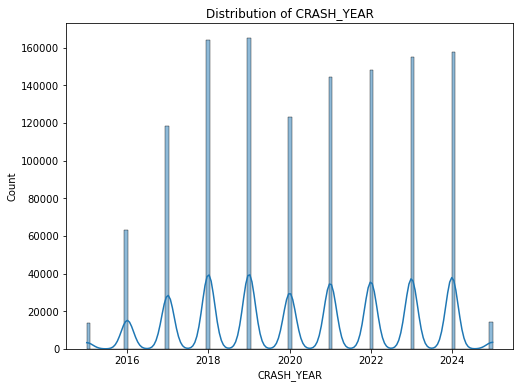

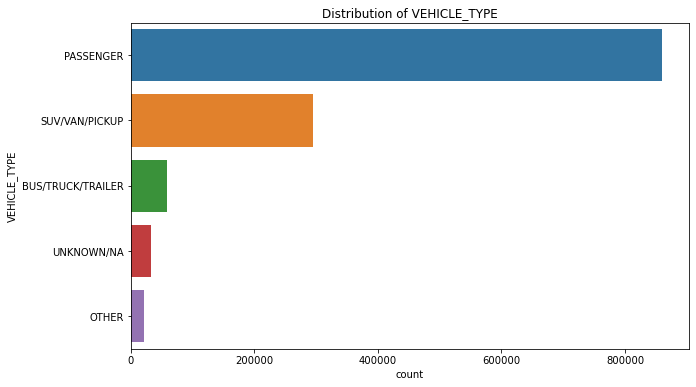

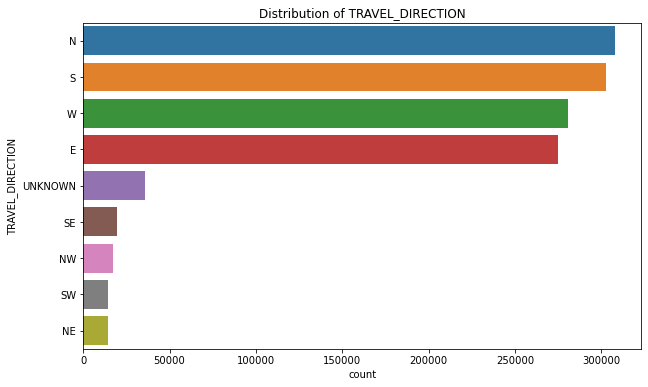

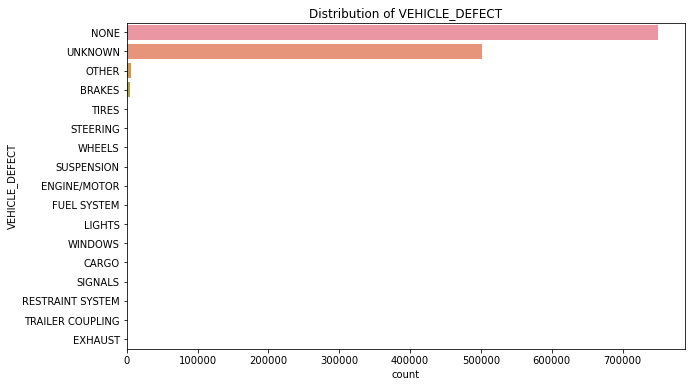

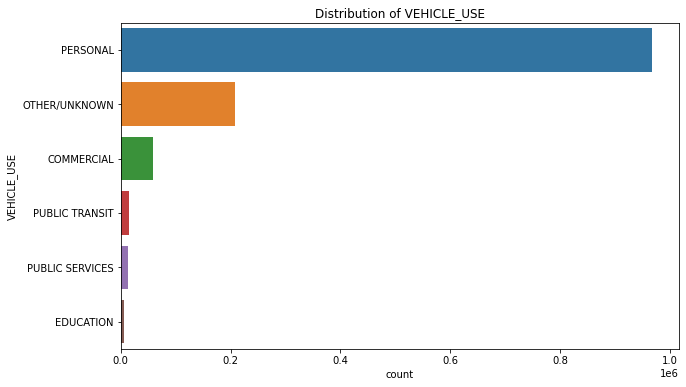

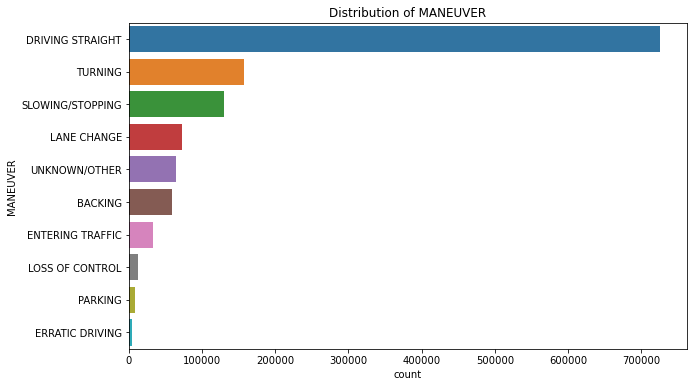

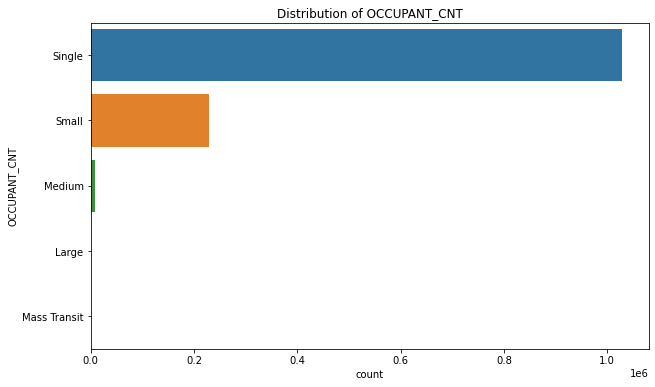

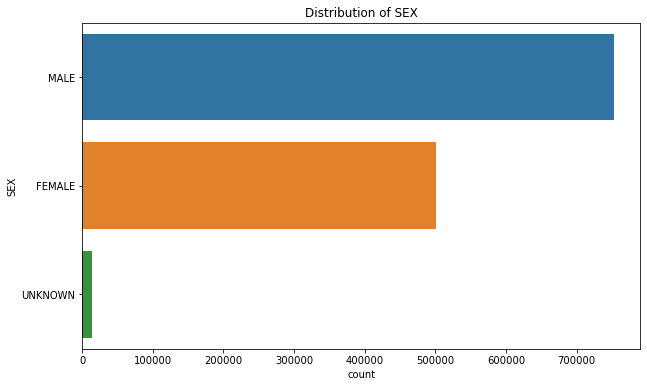

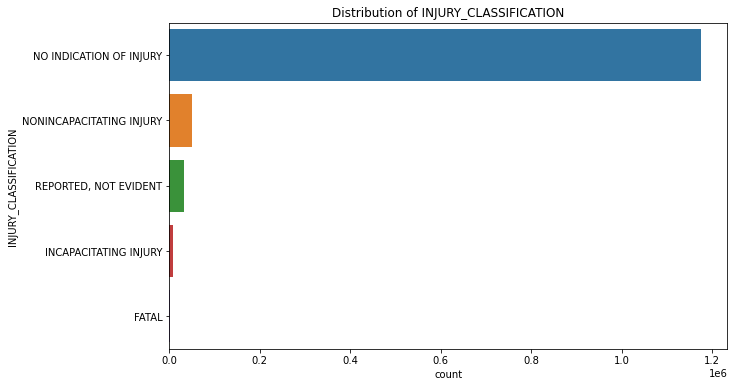

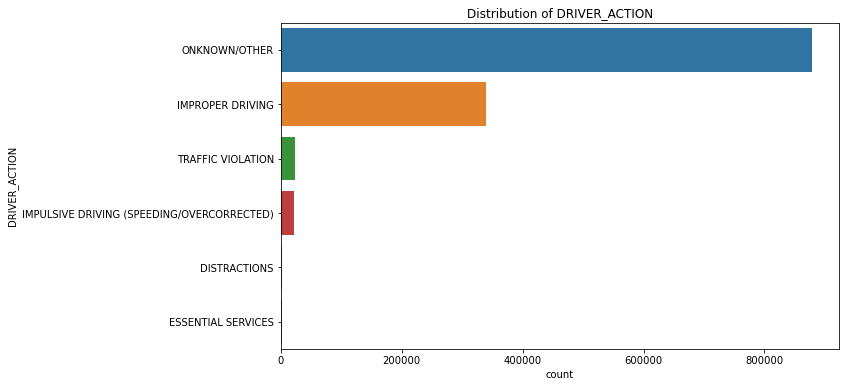

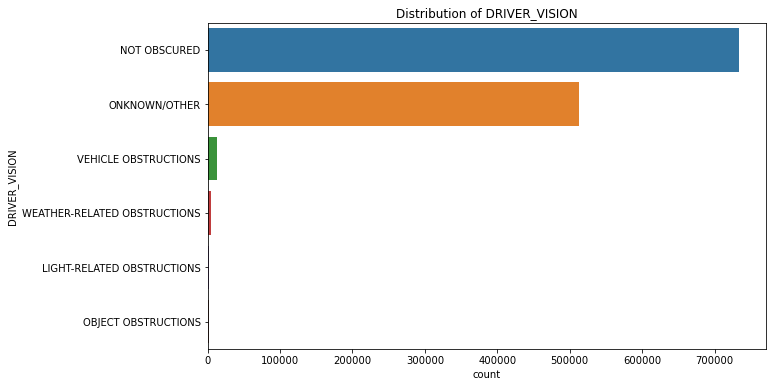

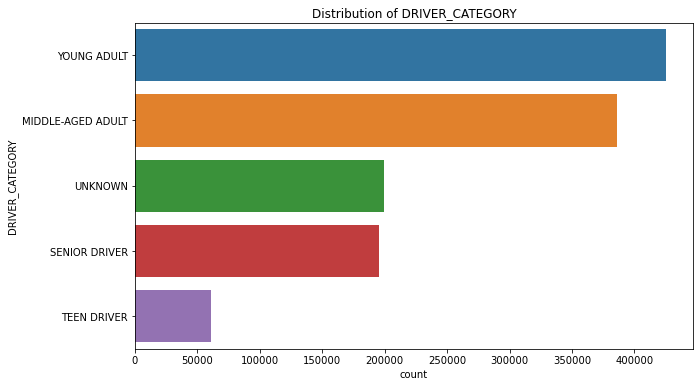

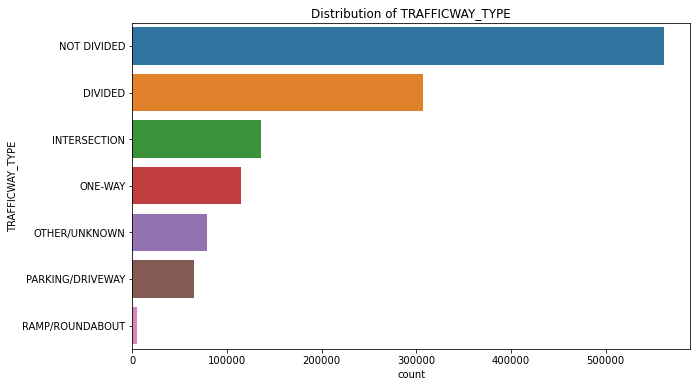

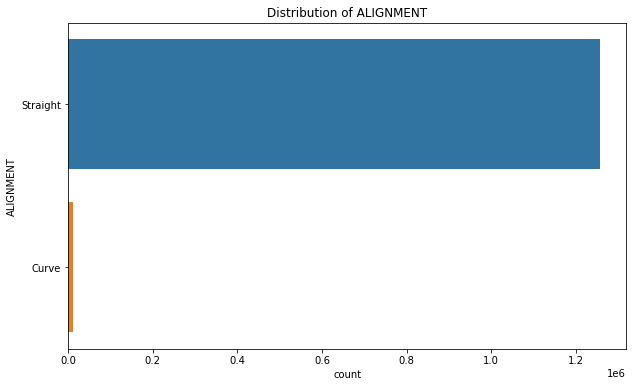

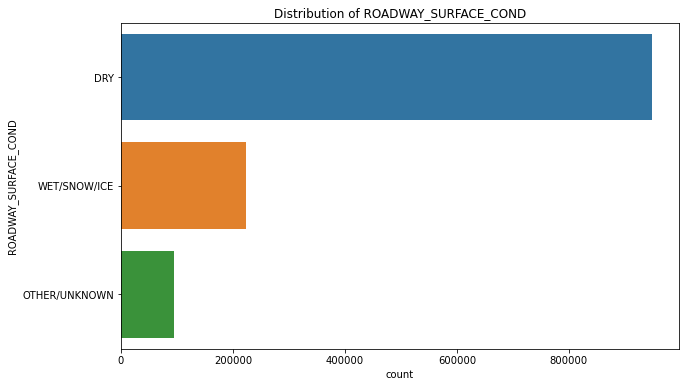

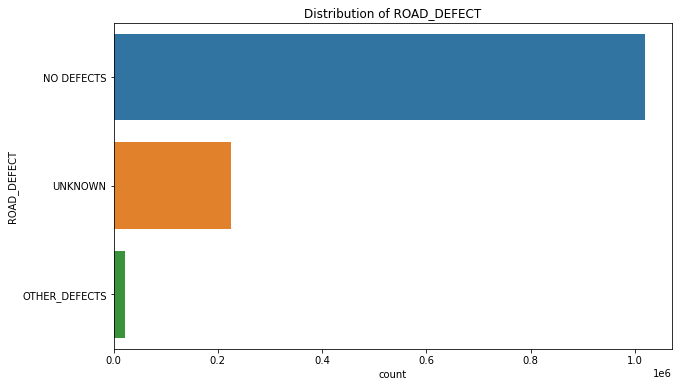

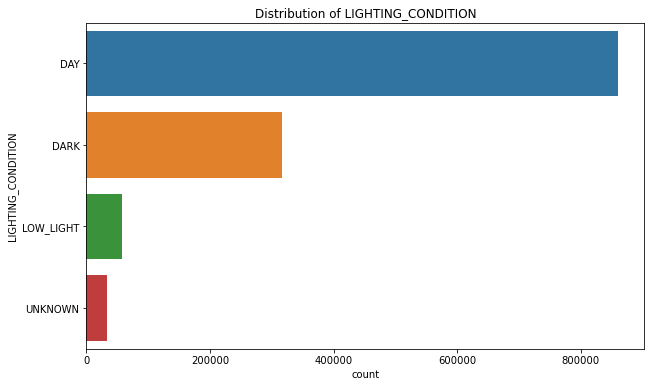

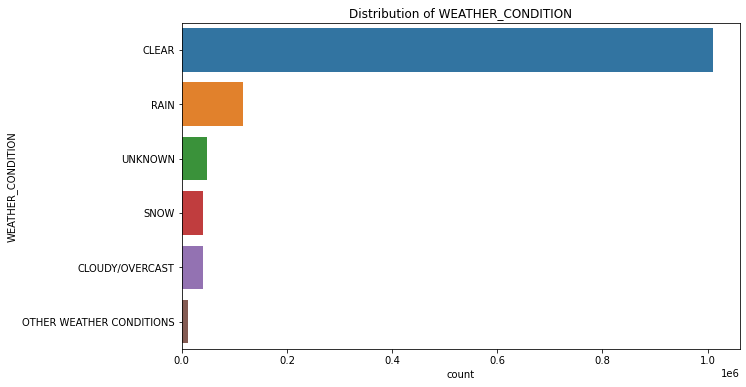

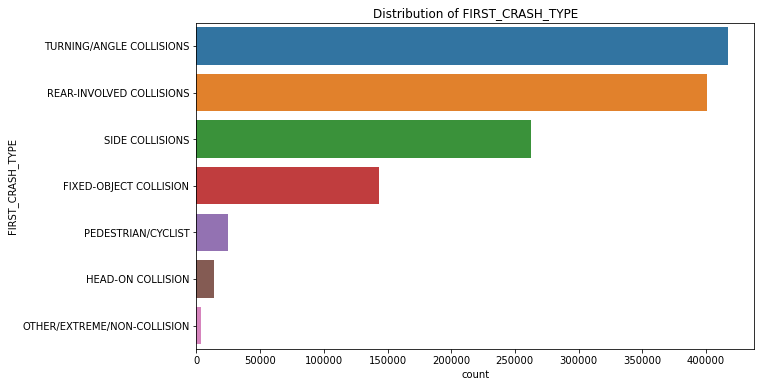

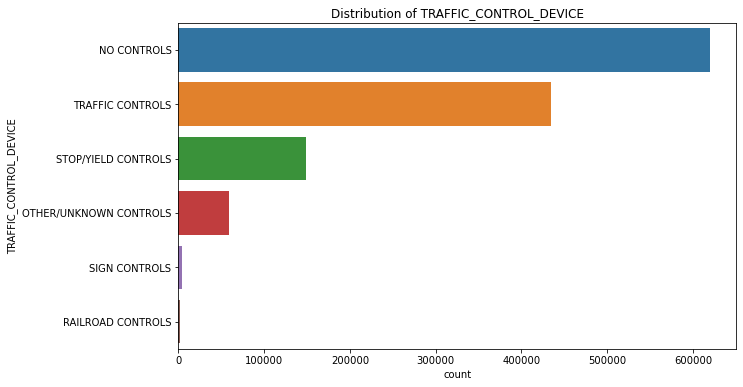

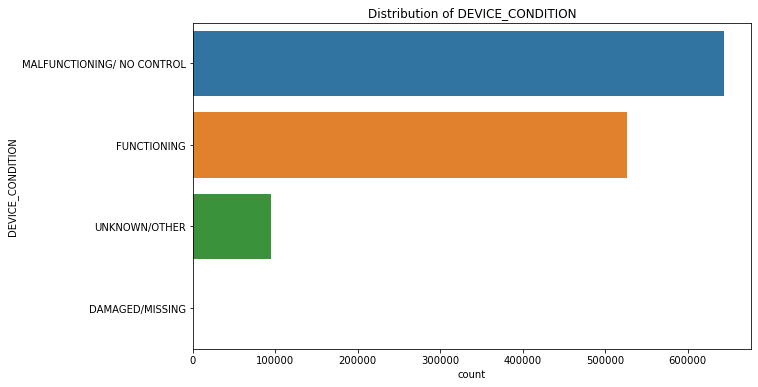

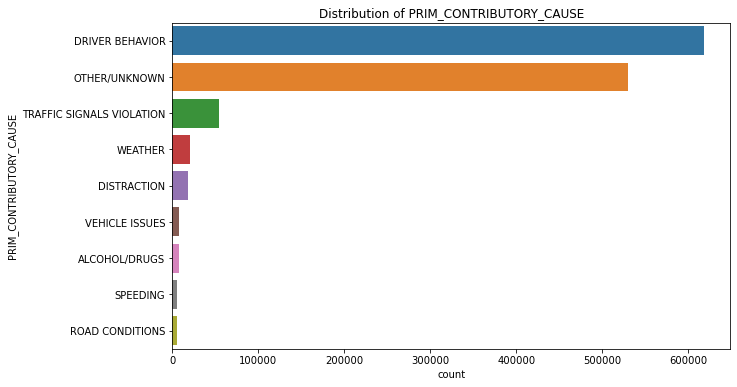

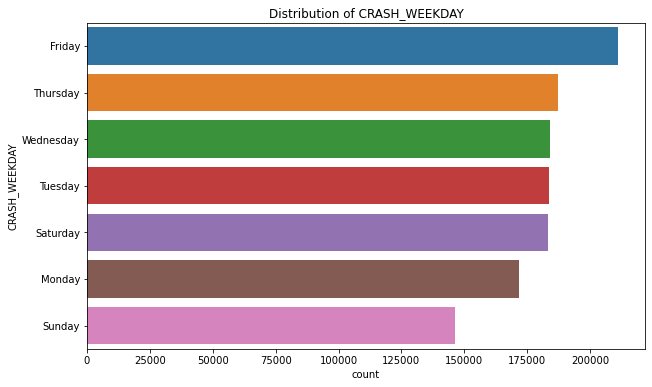

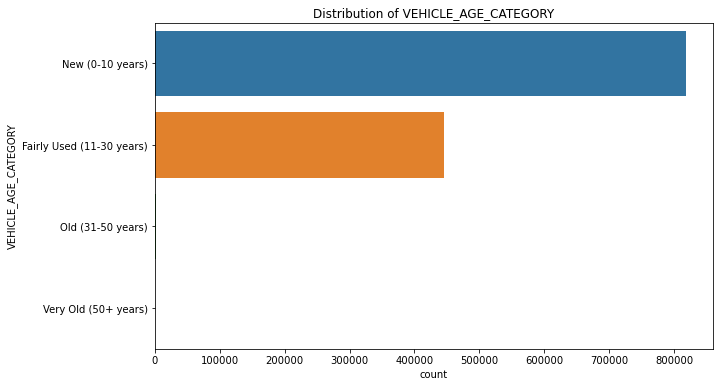

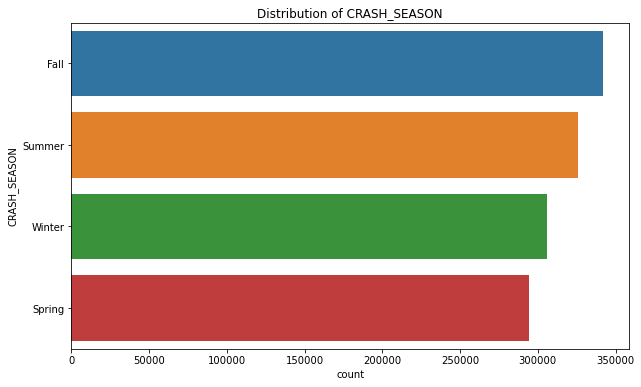

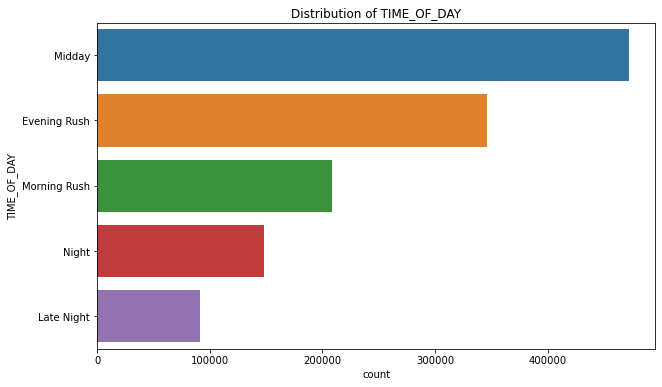

In [294]:
# Numerical Features
from matplotlib import pyplot as plt
import seaborn as sns  


numerical_features = final_crashdf.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(final_crashdf[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Categorical Features
categorical_features = final_crashdf.select_dtypes(include='object').columns
for col in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=final_crashdf[col], order=final_crashdf[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()

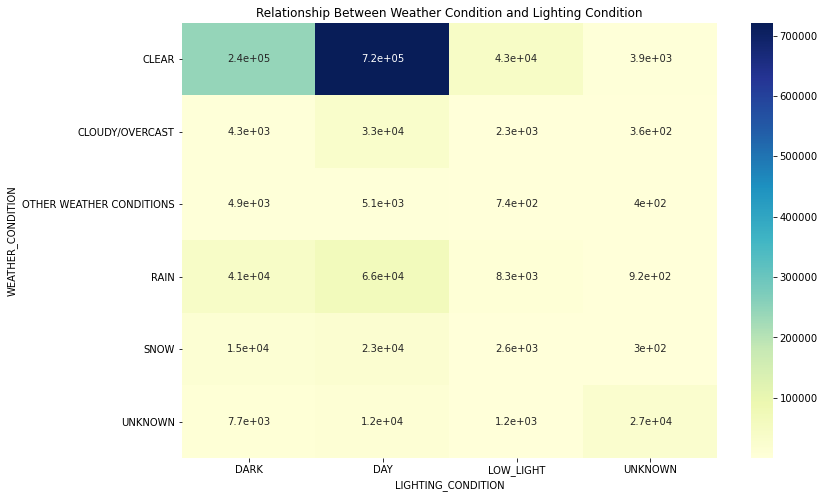

In [295]:
# Relationship between 'WEATHER_CONDITION' and 'LIGHTING_CONDITION'
plt.figure(figsize=(12, 8))
sns.heatmap(pd.crosstab(final_crashdf['WEATHER_CONDITION'], final_crashdf['LIGHTING_CONDITION']),
            annot=True, cmap="YlGnBu")
plt.title('Relationship Between Weather Condition and Lighting Condition')
plt.show()

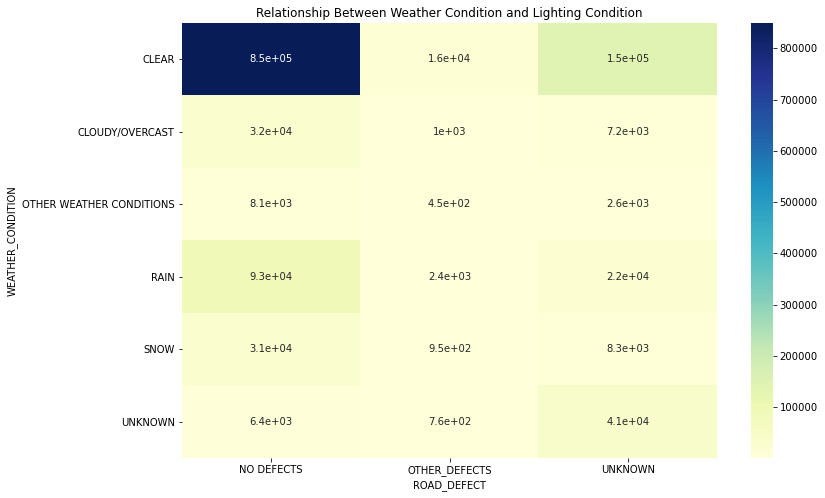

In [296]:
# Relationship between 'WEATHER_CONDITION' and 'ROAD_DEFECT'
plt.figure(figsize=(12, 8))
sns.heatmap(pd.crosstab(final_crashdf['WEATHER_CONDITION'], final_crashdf['ROAD_DEFECT']),
            annot=True, cmap="YlGnBu")
plt.title('Relationship Between Weather Condition and Lighting Condition')
plt.show()

In [297]:
final_crashdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1267020 entries, 0 to 1272467
Data columns (total 27 columns):
 #   Column                   Non-Null Count    Dtype   
---  ------                   --------------    -----   
 0   VEHICLE_TYPE             1267020 non-null  object  
 1   TRAVEL_DIRECTION         1267020 non-null  object  
 2   VEHICLE_DEFECT           1267020 non-null  object  
 3   VEHICLE_USE              1267020 non-null  object  
 4   MANEUVER                 1267020 non-null  object  
 5   OCCUPANT_CNT             1267020 non-null  object  
 6   SEX                      1267020 non-null  object  
 7   INJURY_CLASSIFICATION    1267020 non-null  object  
 8   DRIVER_ACTION            1267020 non-null  object  
 9   DRIVER_VISION            1267020 non-null  object  
 10  DRIVER_CATEGORY          1267020 non-null  object  
 11  POSTED_SPEED_LIMIT       1267020 non-null  category
 12  TRAFFICWAY_TYPE          1267020 non-null  object  
 13  ALIGNMENT                12

In [298]:
from scipy.stats import chi2_contingency
# Example: Analyze categorical features
def analyze_categorical_feature(final_crashdf, feature, target="PRIM_CONTRIBUTORY_CAUSE"):
    # Cross-tabulation
    cross_tab = pd.crosstab(final_crashdf[feature], final_crashdf[target])
    print(f"Cross-tabulation for {feature}:")
    print(cross_tab)
    
    # Chi-square test
    chi2, p, _, _ = chi2_contingency(cross_tab)
    print(f"Chi-square test for {feature}: p-value = {p:.4f}")
    
    # Stacked bar plot
    cross_tab.plot(kind="bar", stacked=True, figsize=(12, 6))
    plt.title(f"{feature} vs {target}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

# Example: Analyze numerical features
def analyze_numerical_feature(final_crashdf, feature, target="PRIM_CONTRIBUTORY_CAUSE"):
    # Grouped boxplot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=target, y=feature, data=final_crashdf)
    plt.title(f"{feature} vs {target}")
    plt.xticks(rotation=90)
    plt.show()

# Example: Analyze time-based features
def analyze_time_feature(final_crashdf, feature, target="PRIM_CONTRIBUTORY_CAUSE"):
    # Group by time feature and target
    grouped = final_crashdf.groupby([feature, target]).size().unstack()
    
    # Line plot
    grouped.plot(kind="line", figsize=(12, 6))
    plt.title(f"{feature} vs {target}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

Cross-tabulation for VEHICLE_TYPE:
PRIM_CONTRIBUTORY_CAUSE  ALCOHOL/DRUGS  DISTRACTION  DRIVER BEHAVIOR  \
VEHICLE_TYPE                                                           
BUS/TRUCK/TRAILER                  141          635            29042   
OTHER                               69          212             9606   
PASSENGER                         5466        12895           421074   
SUV/VAN/PICKUP                    1731         4327           147034   
UNKNOWN/NA                         111          230            11617   

PRIM_CONTRIBUTORY_CAUSE  OTHER/UNKNOWN  ROAD CONDITIONS  SPEEDING  \
VEHICLE_TYPE                                                        
BUS/TRUCK/TRAILER                25095              368       121   
OTHER                             9791              178        63   
PASSENGER                       354518             3419      3776   
SUV/VAN/PICKUP                  122064              897      1047   
UNKNOWN/NA                       18934        

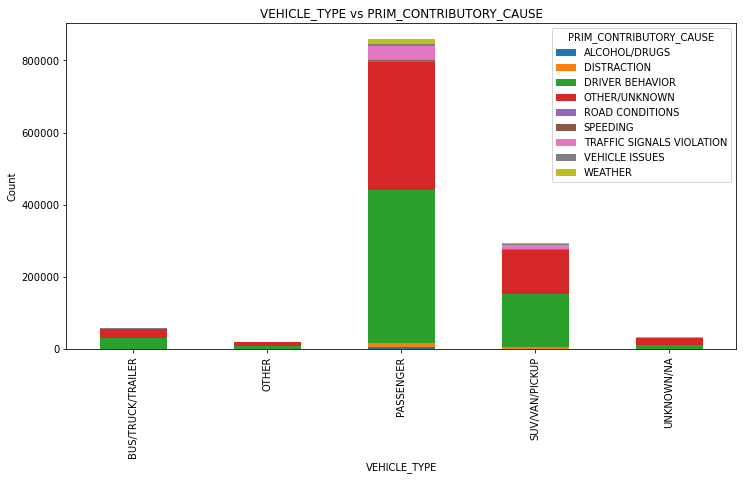

Cross-tabulation for TRAVEL_DIRECTION:
PRIM_CONTRIBUTORY_CAUSE  ALCOHOL/DRUGS  DISTRACTION  DRIVER BEHAVIOR  \
TRAVEL_DIRECTION                                                       
E                                 1573         4018           135305   
N                                 1883         4515           149977   
NE                                  52          116             8003   
NW                                  80          176             9475   
S                                 1885         4638           146742   
SE                                  88          260            10894   
SW                                  57          153             8119   
UNKNOWN                            149          184            11830   
W                                 1751         4239           138028   

PRIM_CONTRIBUTORY_CAUSE  OTHER/UNKNOWN  ROAD CONDITIONS  SPEEDING  \
TRAVEL_DIRECTION                                                    
E                             

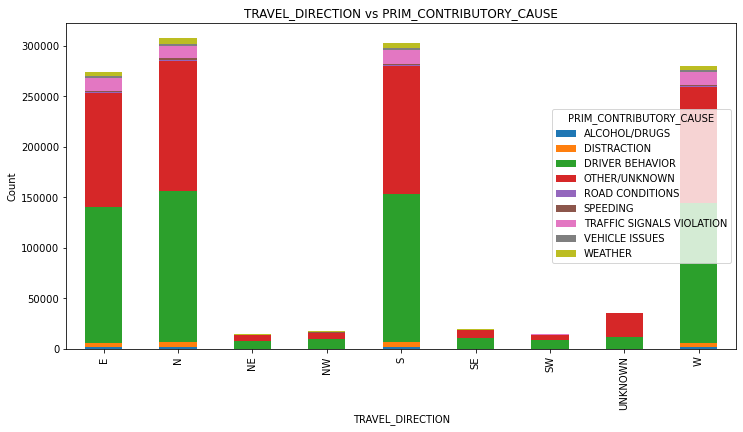

Cross-tabulation for VEHICLE_DEFECT:
PRIM_CONTRIBUTORY_CAUSE  ALCOHOL/DRUGS  DISTRACTION  DRIVER BEHAVIOR  \
VEHICLE_DEFECT                                                         
BRAKES                              21           31             1423   
CARGO                                0            0               14   
ENGINE/MOTOR                         1            3               52   
EXHAUST                              0            0                6   
FUEL SYSTEM                          0            1               66   
LIGHTS                               0            2               37   
NONE                              3752        12070           396852   
OTHER                               46           78             2667   
RESTRAINT SYSTEM                     0            0                7   
SIGNALS                              1            0               13   
STEERING                             6            5              102   
SUSPENSION                 

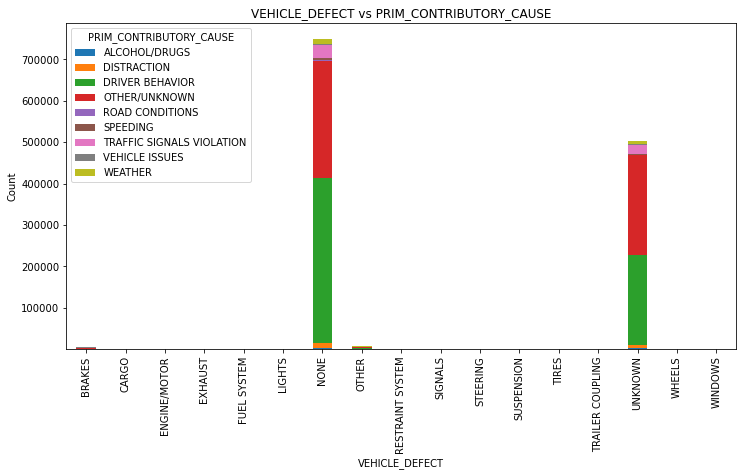

Cross-tabulation for VEHICLE_USE:
PRIM_CONTRIBUTORY_CAUSE  ALCOHOL/DRUGS  DISTRACTION  DRIVER BEHAVIOR  \
VEHICLE_USE                                                            
COMMERCIAL                         152          822            31035   
EDUCATION                           14           65             2577   
OTHER/UNKNOWN                      761         1874            89431   
PERSONAL                          6450        15048           482653   
PUBLIC SERVICES                    109          310             5242   
PUBLIC TRANSIT                      32          180             7435   

PRIM_CONTRIBUTORY_CAUSE  OTHER/UNKNOWN  ROAD CONDITIONS  SPEEDING  \
VEHICLE_USE                                                         
COMMERCIAL                       22875              255       211   
EDUCATION                         2426               14        12   
OTHER/UNKNOWN                   105009              505       614   
PERSONAL                        388495      

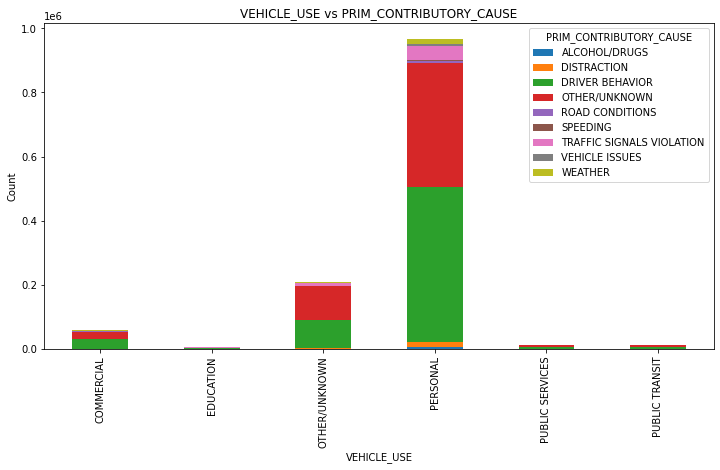

Cross-tabulation for MANEUVER:
PRIM_CONTRIBUTORY_CAUSE  ALCOHOL/DRUGS  DISTRACTION  DRIVER BEHAVIOR  \
MANEUVER                                                               
BACKING                            174          350            34278   
DRIVING STRAIGHT                  4804        11590           336417   
ENTERING TRAFFIC                   104          380            19235   
ERRATIC DRIVING                    161           57             1943   
LANE CHANGE                        185          330            49426   
LOSS OF CONTROL                    123          633             3676   
PARKING                             40           89             3566   
SLOWING/STOPPING                   579         2987            63165   
TURNING                            514         1050            91243   
UNKNOWN/OTHER                      834          833            15424   

PRIM_CONTRIBUTORY_CAUSE  OTHER/UNKNOWN  ROAD CONDITIONS  SPEEDING  \
MANEUVER                           

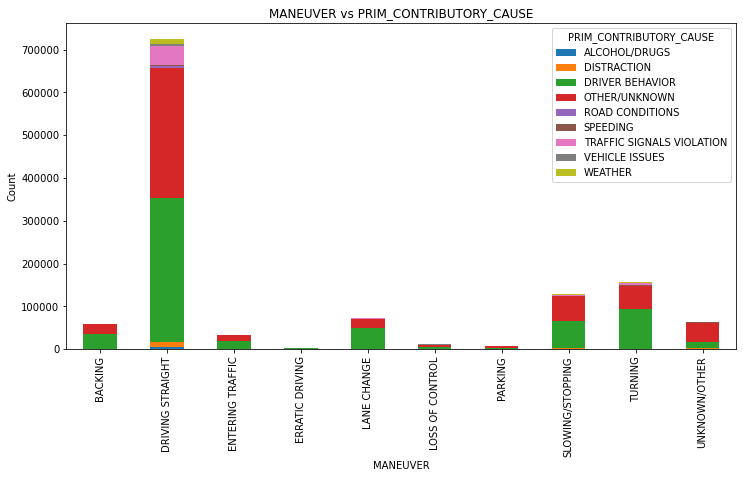

Cross-tabulation for SEX:
PRIM_CONTRIBUTORY_CAUSE  ALCOHOL/DRUGS  DISTRACTION  DRIVER BEHAVIOR  \
SEX                                                                    
FEMALE                            2244         7572           245685   
MALE                              5255        10666           364618   
UNKNOWN                             19           61             8070   

PRIM_CONTRIBUTORY_CAUSE  OTHER/UNKNOWN  ROAD CONDITIONS  SPEEDING  \
SEX                                                                 
FEMALE                          209951             1792      1698   
MALE                            315696             3098      3266   
UNKNOWN                           4755               16       117   

PRIM_CONTRIBUTORY_CAUSE  TRAFFIC SIGNALS VIOLATION  VEHICLE ISSUES  WEATHER  
SEX                                                                          
FEMALE                                       20701            2854     7793  
MALE                             

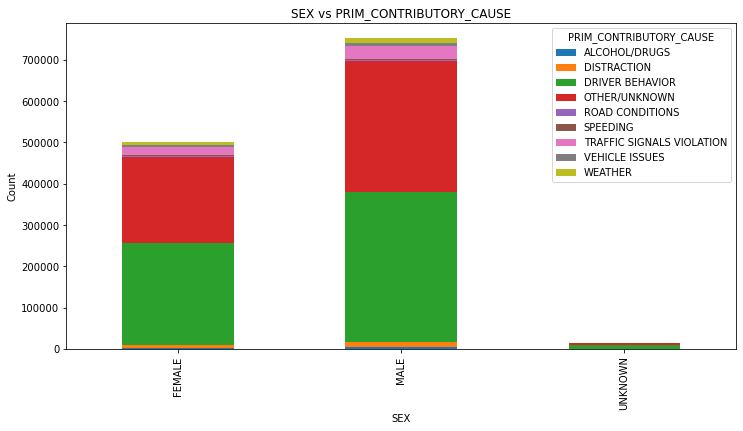

Cross-tabulation for DRIVER_ACTION:
PRIM_CONTRIBUTORY_CAUSE                     ALCOHOL/DRUGS  DISTRACTION  \
DRIVER_ACTION                                                            
DISTRACTIONS                                           29         1595   
ESSENTIAL SERVICES                                     13           42   
IMPROPER DRIVING                                     1388         2389   
IMPULSIVE DRIVING (SPEEDING/OVERCORRECTED)            407          367   
ONKNOWN/OTHER                                        5442        13743   
TRAFFIC VIOLATION                                     239          163   

PRIM_CONTRIBUTORY_CAUSE                     DRIVER BEHAVIOR  OTHER/UNKNOWN  \
DRIVER_ACTION                                                                
DISTRACTIONS                                            249            515   
ESSENTIAL SERVICES                                      589            604   
IMPROPER DRIVING                                     261630

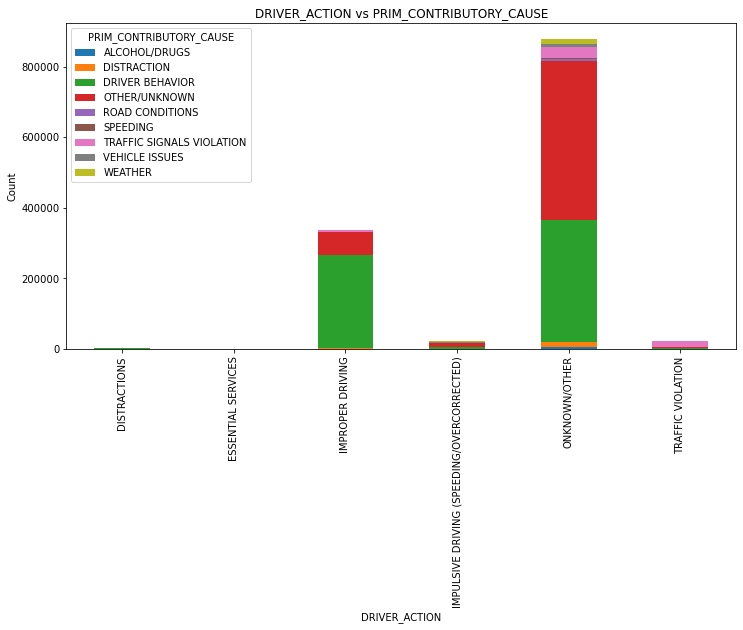

Cross-tabulation for DRIVER_VISION:
PRIM_CONTRIBUTORY_CAUSE       ALCOHOL/DRUGS  DISTRACTION  DRIVER BEHAVIOR  \
DRIVER_VISION                                                               
LIGHT-RELATED OBSTRUCTIONS                1           94              725   
NOT OBSCURED                           4004        12434           385626   
OBJECT OBSTRUCTIONS                       3            9              509   
ONKNOWN/OTHER                          3481         5501           222077   
VEHICLE OBSTRUCTIONS                     21          208             7725   
WEATHER-RELATED OBSTRUCTIONS              8           53             1711   

PRIM_CONTRIBUTORY_CAUSE       OTHER/UNKNOWN  ROAD CONDITIONS  SPEEDING  \
DRIVER_VISION                                                            
LIGHT-RELATED OBSTRUCTIONS              955                9         2   
NOT OBSCURED                         273176             3515      3386   
OBJECT OBSTRUCTIONS                     602        

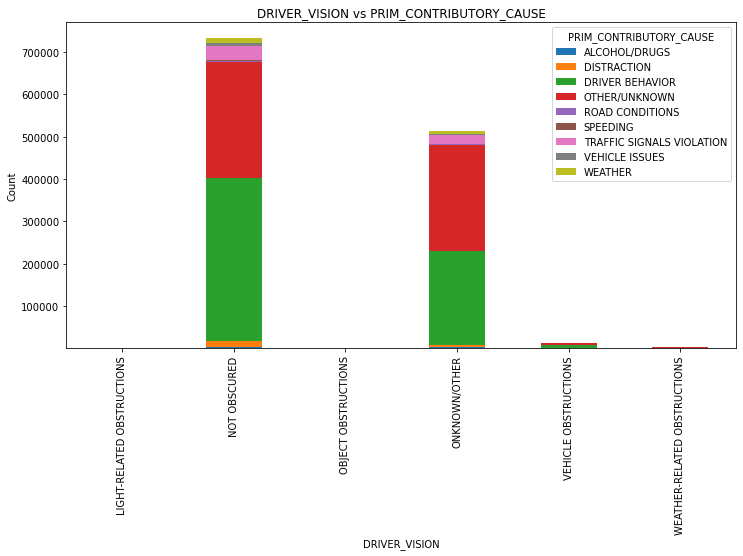

Cross-tabulation for DRIVER_CATEGORY:
PRIM_CONTRIBUTORY_CAUSE  ALCOHOL/DRUGS  DISTRACTION  DRIVER BEHAVIOR  \
DRIVER_CATEGORY                                                        
MIDDLE-AGED ADULT                 2600         5957           188938   
SENIOR DRIVER                      850         2689            95409   
TEEN DRIVER                        248         1000            30399   
UNKNOWN                            636         1560            94085   
YOUNG ADULT                       3184         7093           209542   

PRIM_CONTRIBUTORY_CAUSE  OTHER/UNKNOWN  ROAD CONDITIONS  SPEEDING  \
DRIVER_CATEGORY                                                     
MIDDLE-AGED ADULT               160576             1815      1376   
SENIOR DRIVER                    82938              919       561   
TEEN DRIVER                      23583              139       365   
UNKNOWN                          92580              350       920   
YOUNG ADULT                     170725     

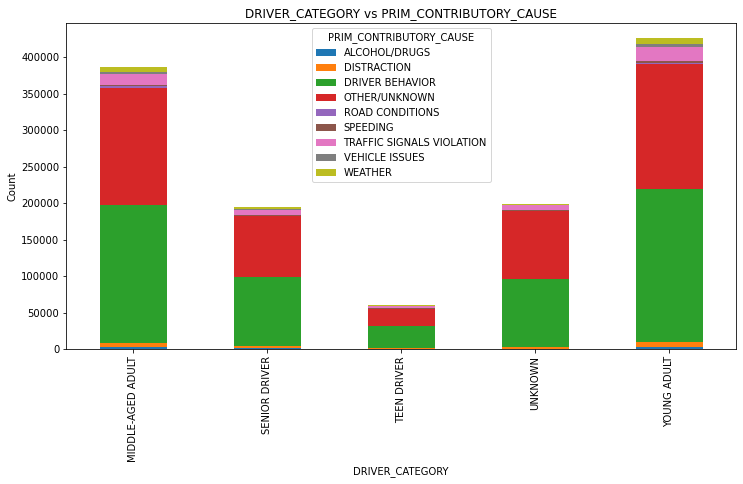

Cross-tabulation for TRAFFICWAY_TYPE:
PRIM_CONTRIBUTORY_CAUSE  ALCOHOL/DRUGS  DISTRACTION  DRIVER BEHAVIOR  \
TRAFFICWAY_TYPE                                                        
DIVIDED                           1801         5290           155478   
INTERSECTION                       734         1589            62066   
NOT DIVIDED                       3387         8139           275016   
ONE-WAY                            951         1758            57735   
OTHER/UNKNOWN                      410          862            34065   
PARKING/DRIVEWAY                   210          580            31723   
RAMP/ROUNDABOUT                     25           81             2290   

PRIM_CONTRIBUTORY_CAUSE  OTHER/UNKNOWN  ROAD CONDITIONS  SPEEDING  \
TRAFFICWAY_TYPE                                                     
DIVIDED                         122723             1511      1754   
INTERSECTION                     47878              254         0   
NOT DIVIDED                     24150

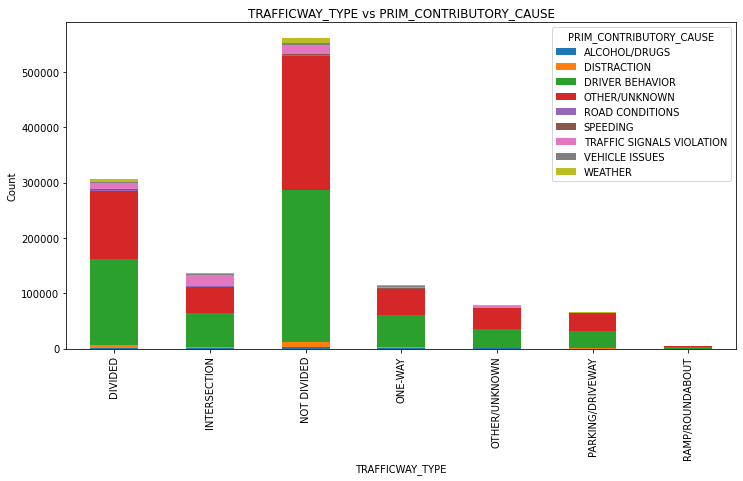

Cross-tabulation for ALIGNMENT:
PRIM_CONTRIBUTORY_CAUSE  ALCOHOL/DRUGS  DISTRACTION  DRIVER BEHAVIOR  \
ALIGNMENT                                                              
Curve                               93          187             4917   
Straight                          7425        18112           613456   

PRIM_CONTRIBUTORY_CAUSE  OTHER/UNKNOWN  ROAD CONDITIONS  SPEEDING  \
ALIGNMENT                                                           
Curve                             4405              122       225   
Straight                        525997             4784      4856   

PRIM_CONTRIBUTORY_CAUSE  TRAFFIC SIGNALS VIOLATION  VEHICLE ISSUES  WEATHER  
ALIGNMENT                                                                    
Curve                                          226             192      923  
Straight                                     53580            7761    19759  
Chi-square test for ALIGNMENT: p-value = 0.0000


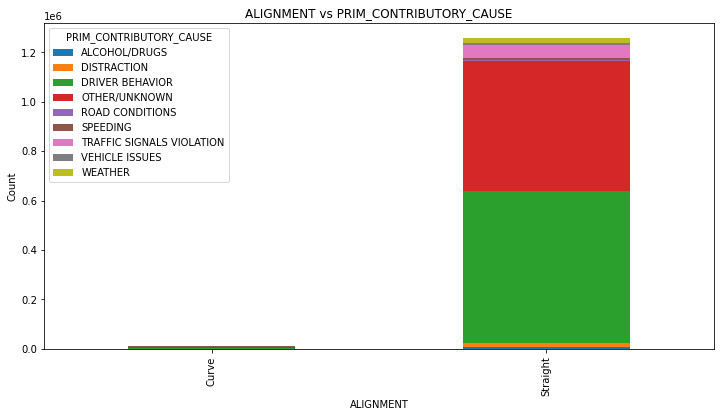

Cross-tabulation for ROADWAY_SURFACE_COND:
PRIM_CONTRIBUTORY_CAUSE  ALCOHOL/DRUGS  DISTRACTION  DRIVER BEHAVIOR  \
ROADWAY_SURFACE_COND                                                   
DRY                               5833        15128           485044   
OTHER/UNKNOWN                      260          772            32630   
WET/SNOW/ICE                      1425         2399           100699   

PRIM_CONTRIBUTORY_CAUSE  OTHER/UNKNOWN  ROAD CONDITIONS  SPEEDING  \
ROADWAY_SURFACE_COND                                                
DRY                             388273             3325      2766   
OTHER/UNKNOWN                    57594              607        97   
WET/SNOW/ICE                     84535              974      2218   

PRIM_CONTRIBUTORY_CAUSE  TRAFFIC SIGNALS VIOLATION  VEHICLE ISSUES  WEATHER  
ROADWAY_SURFACE_COND                                                         
DRY                                          41806            6060      526  
OTHER/UNKNOWN   

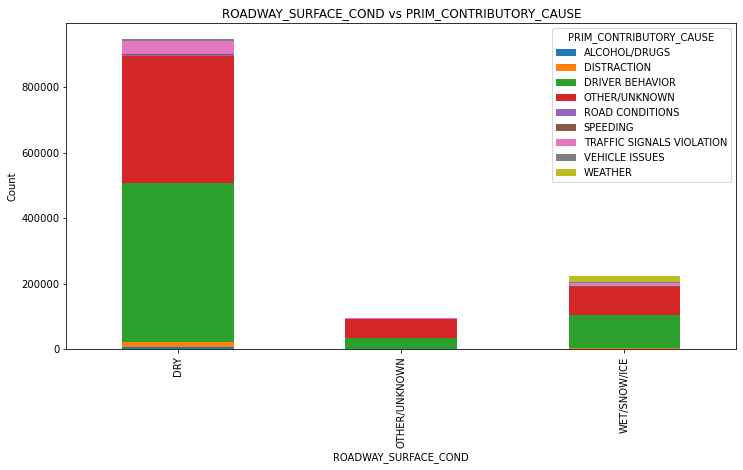

Cross-tabulation for ROAD_DEFECT:
PRIM_CONTRIBUTORY_CAUSE  ALCOHOL/DRUGS  DISTRACTION  DRIVER BEHAVIOR  \
ROAD_DEFECT                                                            
NO DEFECTS                        6394        15665           522295   
OTHER_DEFECTS                      107          314             7564   
UNKNOWN                           1017         2320            88514   

PRIM_CONTRIBUTORY_CAUSE  OTHER/UNKNOWN  ROAD CONDITIONS  SPEEDING  \
ROAD_DEFECT                                                         
NO DEFECTS                      399693             1517      4476   
OTHER_DEFECTS                     9135             3078       109   
UNKNOWN                         121574              311       496   

PRIM_CONTRIBUTORY_CAUSE  TRAFFIC SIGNALS VIOLATION  VEHICLE ISSUES  WEATHER  
ROAD_DEFECT                                                                  
NO DEFECTS                                   46200            6906    16305  
OTHER_DEFECTS            

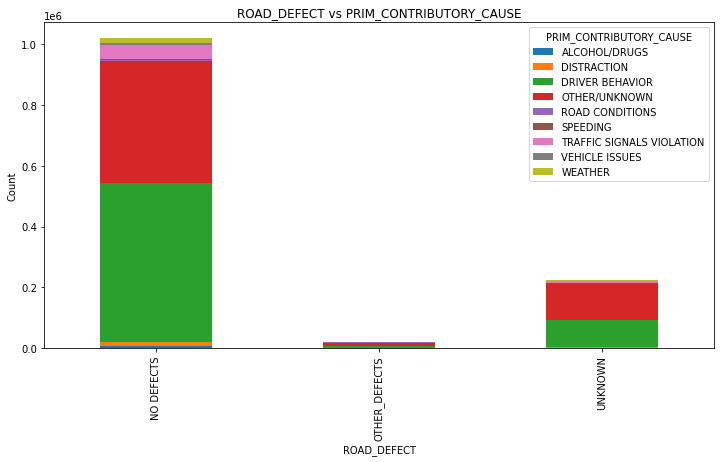

Cross-tabulation for LIGHTING_CONDITION:
PRIM_CONTRIBUTORY_CAUSE  ALCOHOL/DRUGS  DISTRACTION  DRIVER BEHAVIOR  \
LIGHTING_CONDITION                                                     
DARK                              4919         5442           142429   
DAY                               2233        11850           439811   
LOW_LIGHT                          295          878            27890   
UNKNOWN                             71          129             8243   

PRIM_CONTRIBUTORY_CAUSE  OTHER/UNKNOWN  ROAD CONDITIONS  SPEEDING  \
LIGHTING_CONDITION                                                  
DARK                            129628             1412      2050   
DAY                             353573             3188      2702   
LOW_LIGHT                        23769              236       303   
UNKNOWN                          23432               70        26   

PRIM_CONTRIBUTORY_CAUSE  TRAFFIC SIGNALS VIOLATION  VEHICLE ISSUES  WEATHER  
LIGHTING_CONDITION               

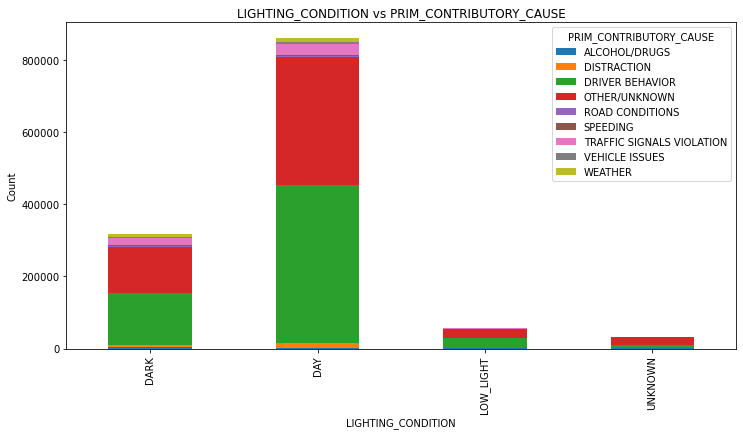

Cross-tabulation for WEATHER_CONDITION:
PRIM_CONTRIBUTORY_CAUSE   ALCOHOL/DRUGS  DISTRACTION  DRIVER BEHAVIOR  \
WEATHER_CONDITION                                                       
CLEAR                              6200        15660           509758   
CLOUDY/OVERCAST                     150          689            21103   
OTHER WEATHER CONDITIONS             87          136             4301   
RAIN                                751         1271            54164   
SNOW                                229          310            15449   
UNKNOWN                             101          233            13598   

PRIM_CONTRIBUTORY_CAUSE   OTHER/UNKNOWN  ROAD CONDITIONS  SPEEDING  \
WEATHER_CONDITION                                                    
CLEAR                            419059             3929      3151   
CLOUDY/OVERCAST                   15210              159       205   
OTHER WEATHER CONDITIONS           4189               59        90   
RAIN                     

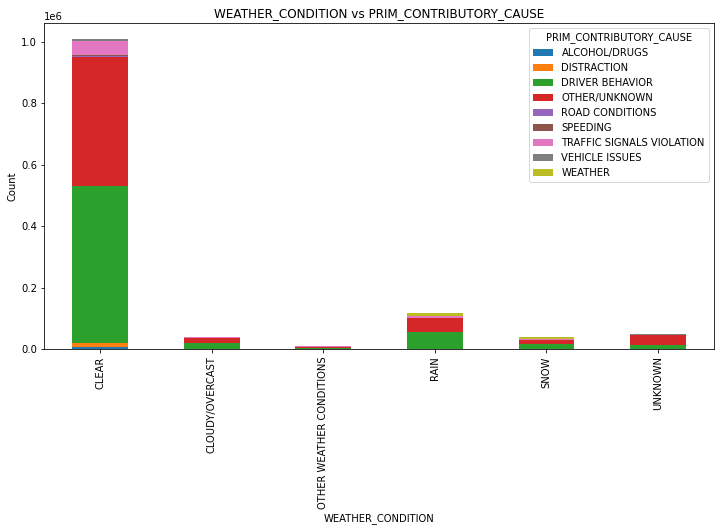

Cross-tabulation for FIRST_CRASH_TYPE:
PRIM_CONTRIBUTORY_CAUSE      ALCOHOL/DRUGS  DISTRACTION  DRIVER BEHAVIOR  \
FIRST_CRASH_TYPE                                                           
FIXED-OBJECT COLLISION                3056         4457            43331   
HEAD-ON COLLISION                      341          262             6444   
OTHER/EXTREME/NON-COLLISION             24           32              370   
PEDESTRIAN/CYCLIST                     101          374            10635   
REAR-INVOLVED COLLISIONS              2028         9368           192500   
SIDE COLLISIONS                        862         1774           145519   
TURNING/ANGLE COLLISIONS              1106         2032           219574   

PRIM_CONTRIBUTORY_CAUSE      OTHER/UNKNOWN  ROAD CONDITIONS  SPEEDING  \
FIRST_CRASH_TYPE                                                        
FIXED-OBJECT COLLISION               79648             2503      1140   
HEAD-ON COLLISION                     5558               

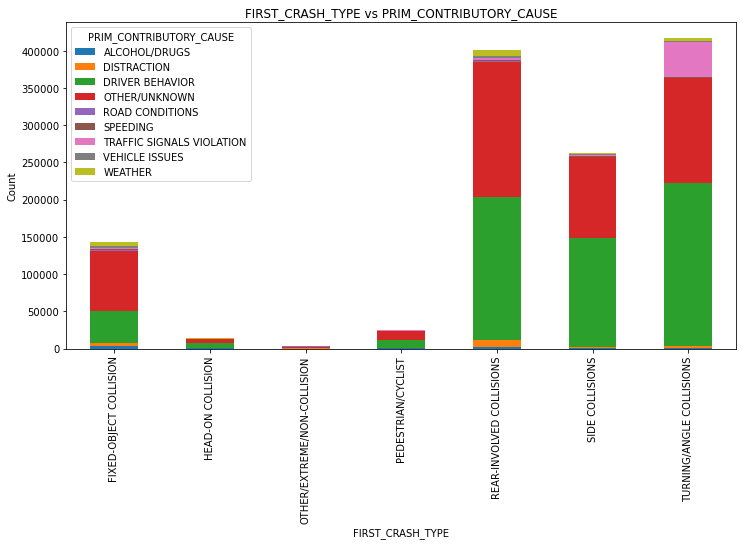

Cross-tabulation for TRAFFIC_CONTROL_DEVICE:
PRIM_CONTRIBUTORY_CAUSE  ALCOHOL/DRUGS  DISTRACTION  DRIVER BEHAVIOR  \
TRAFFIC_CONTROL_DEVICE                                                 
NO CONTROLS                       4226         9363           307691   
OTHER/UNKNOWN CONTROLS             298          516            19959   
RAILROAD CONTROLS                    4           24              678   
SIGN CONTROLS                       34           57             2137   
STOP/YIELD CONTROLS                593         1627            74105   
TRAFFIC CONTROLS                  2363         6712           213803   

PRIM_CONTRIBUTORY_CAUSE  OTHER/UNKNOWN  ROAD CONDITIONS  SPEEDING  \
TRAFFIC_CONTROL_DEVICE                                              
NO CONTROLS                     275209             3269      2584   
OTHER/UNKNOWN CONTROLS           36628              296       163   
RAILROAD CONTROLS                  686               12         3   
SIGN CONTROLS                    

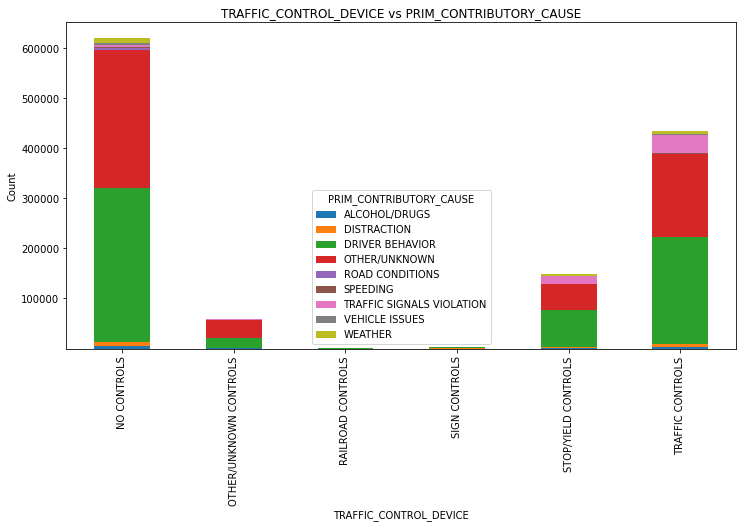

Cross-tabulation for DEVICE_CONDITION:
PRIM_CONTRIBUTORY_CAUSE     ALCOHOL/DRUGS  DISTRACTION  DRIVER BEHAVIOR  \
DEVICE_CONDITION                                                          
DAMAGED/MISSING                         0            4              333   
FUNCTIONING                          2798         7842           265755   
MALFUNCTIONING/ NO CONTROL           4238         9627           320083   
UNKNOWN/OTHER                         482          826            32202   

PRIM_CONTRIBUTORY_CAUSE     OTHER/UNKNOWN  ROAD CONDITIONS  SPEEDING  \
DEVICE_CONDITION                                                       
DAMAGED/MISSING                       206               27        12   
FUNCTIONING                        189730             1227      2176   
MALFUNCTIONING/ NO CONTROL         283705             3340      2645   
UNKNOWN/OTHER                       56761              312       248   

PRIM_CONTRIBUTORY_CAUSE     TRAFFIC SIGNALS VIOLATION  VEHICLE ISSUES  WEATHE

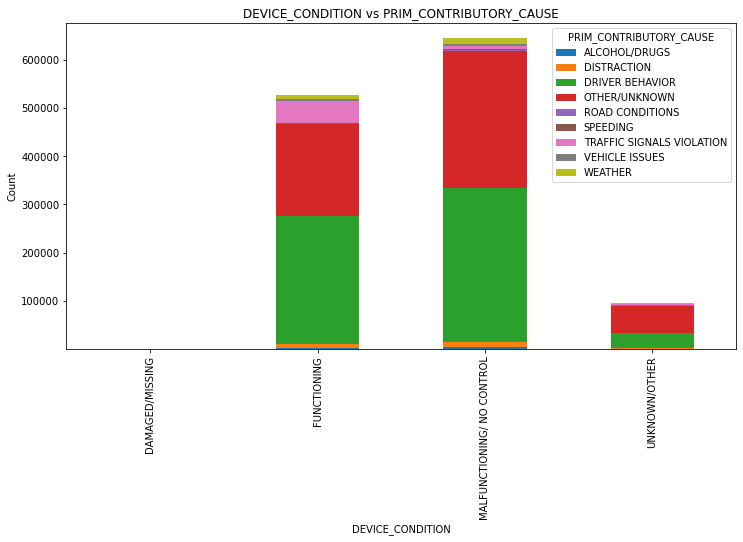

Cross-tabulation for CRASH_WEEKDAY:
PRIM_CONTRIBUTORY_CAUSE  ALCOHOL/DRUGS  DISTRACTION  DRIVER BEHAVIOR  \
CRASH_WEEKDAY                                                          
Friday                            1163         2960           105039   
Monday                             833         2453            83440   
Saturday                          1559         2744            87999   
Sunday                            1662         2430            67238   
Thursday                           831         2621            93254   
Tuesday                            705         2554            90453   
Wednesday                          765         2537            90950   

PRIM_CONTRIBUTORY_CAUSE  OTHER/UNKNOWN  ROAD CONDITIONS  SPEEDING  \
CRASH_WEEKDAY                                                       
Friday                           87776              766       781   
Monday                           72474              715       689   
Saturday                         76355 

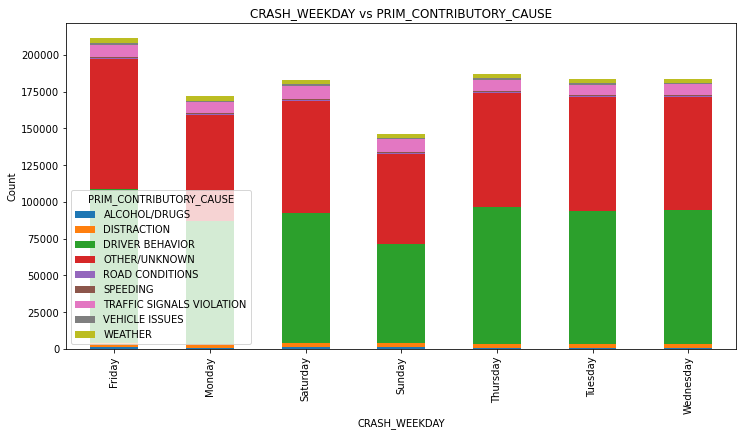

Cross-tabulation for CRASH_SEASON:
PRIM_CONTRIBUTORY_CAUSE  ALCOHOL/DRUGS  DISTRACTION  DRIVER BEHAVIOR  \
CRASH_SEASON                                                           
Fall                              2038         4750           167403   
Spring                            1716         4410           145277   
Summer                            1883         5255           160433   
Winter                            1881         3884           145260   

PRIM_CONTRIBUTORY_CAUSE  OTHER/UNKNOWN  ROAD CONDITIONS  SPEEDING  \
CRASH_SEASON                                                        
Fall                            143899             1264      1339   
Spring                          122963             1284      1147   
Summer                          137644             1198       967   
Winter                          125896             1160      1628   

PRIM_CONTRIBUTORY_CAUSE  TRAFFIC SIGNALS VIOLATION  VEHICLE ISSUES  WEATHER  
CRASH_SEASON                           

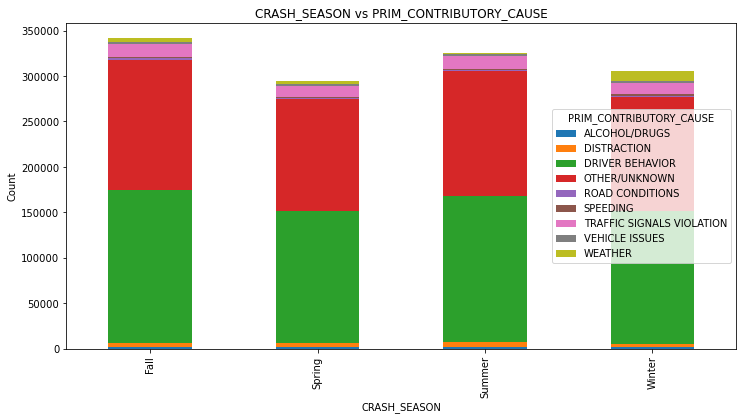

Cross-tabulation for TIME_OF_DAY:
PRIM_CONTRIBUTORY_CAUSE  ALCOHOL/DRUGS  DISTRACTION  DRIVER BEHAVIOR  \
TIME_OF_DAY                                                            
Evening Rush                      1472         4603           174073   
Late Night                        2581         1892            34223   
Midday                            1043         6330           237573   
Morning Rush                       450         2849           105100   
Night                             1972         2625            67404   

PRIM_CONTRIBUTORY_CAUSE  OTHER/UNKNOWN  ROAD CONDITIONS  SPEEDING  \
TIME_OF_DAY                                                         
Evening Rush                    146467              973      1082   
Late Night                       39650              371       805   
Midday                          199516             1707      1359   
Morning Rush                     83313             1071       973   
Night                            61456         

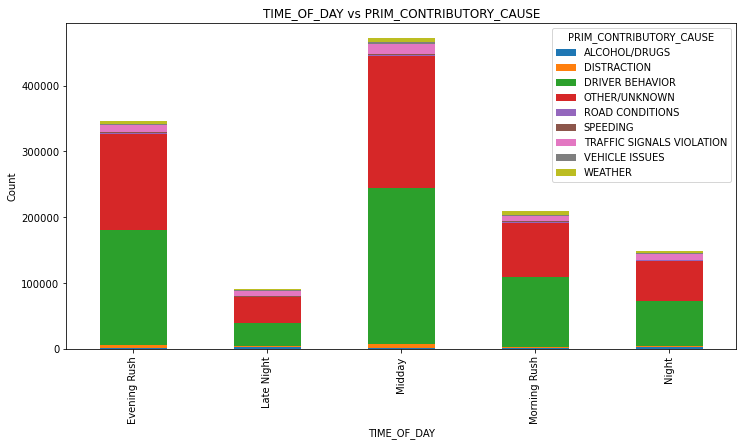

In [299]:
# Analyze categorical features
categorical_features = [
    "VEHICLE_TYPE", "TRAVEL_DIRECTION", "VEHICLE_DEFECT", "VEHICLE_USE", 
    "MANEUVER", "SEX", "DRIVER_ACTION", "DRIVER_VISION", "DRIVER_CATEGORY", 
    "TRAFFICWAY_TYPE", "ALIGNMENT", "ROADWAY_SURFACE_COND", "ROAD_DEFECT", 
    "LIGHTING_CONDITION", "WEATHER_CONDITION", "FIRST_CRASH_TYPE", 
    "TRAFFIC_CONTROL_DEVICE", "DEVICE_CONDITION", "CRASH_WEEKDAY","CRASH_SEASON","TIME_OF_DAY"
]
for feature in categorical_features:
    analyze_categorical_feature(final_crashdf, feature)


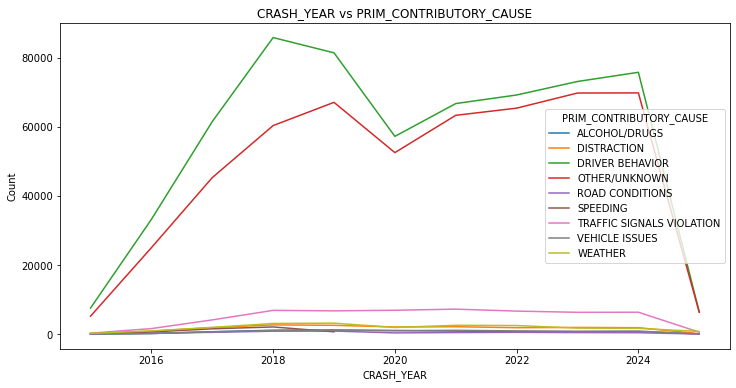

In [300]:
# Analyze time-based features
time_features = ["CRASH_YEAR"]
for feature in time_features:
    analyze_time_feature(final_crashdf, feature)

#### Based on the Exploratory Data Analysis (EDA) that I have conducted, I have Identified a few columns that I feel may not be necessary in or modelling. I will br dropping these columns.

In [301]:
columns_to_drop = ['INJURY_CLASSIFICATION',]

# Drop columns
final_crashdf = final_crashdf.drop(columns=columns_to_drop, errors='ignore')

In [302]:
final_crashdf.head()

,VEHICLE_TYPE,TRAVEL_DIRECTION,VEHICLE_DEFECT,VEHICLE_USE,MANEUVER,OCCUPANT_CNT,SEX,DRIVER_ACTION,DRIVER_VISION,DRIVER_CATEGORY,...,WEATHER_CONDITION,FIRST_CRASH_TYPE,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,PRIM_CONTRIBUTORY_CAUSE,CRASH_YEAR,CRASH_WEEKDAY,VEHICLE_AGE_CATEGORY,CRASH_SEASON,TIME_OF_DAY
0,PASSENGER,N,NONE,PERSONAL,TURNING,Single,MALE,IMPROPER DRIVING,ONKNOWN/OTHER,UNKNOWN,...,CLEAR,TURNING/ANGLE COLLISIONS,TRAFFIC CONTROLS,FUNCTIONING,OTHER/UNKNOWN,2015,Tuesday,Fairly Used (11-30 years),Summer,Midday
1,SUV/VAN/PICKUP,W,NONE,PERSONAL,DRIVING STRAIGHT,Single,MALE,ONKNOWN/OTHER,NOT OBSCURED,YOUNG ADULT,...,CLEAR,TURNING/ANGLE COLLISIONS,TRAFFIC CONTROLS,FUNCTIONING,OTHER/UNKNOWN,2015,Tuesday,New (0-10 years),Summer,Midday
2,SUV/VAN/PICKUP,E,NONE,PERSONAL,DRIVING STRAIGHT,Single,MALE,IMPROPER DRIVING,ONKNOWN/OTHER,UNKNOWN,...,CLEAR,REAR-INVOLVED COLLISIONS,TRAFFIC CONTROLS,FUNCTIONING,DRIVER BEHAVIOR,2015,Friday,Fairly Used (11-30 years),Summer,Evening Rush
3,PASSENGER,E,NONE,PERSONAL,DRIVING STRAIGHT,Single,MALE,ONKNOWN/OTHER,NOT OBSCURED,MIDDLE-AGED ADULT,...,CLEAR,REAR-INVOLVED COLLISIONS,TRAFFIC CONTROLS,FUNCTIONING,DRIVER BEHAVIOR,2015,Friday,New (0-10 years),Summer,Evening Rush
4,PASSENGER,E,NONE,PERSONAL,SLOWING/STOPPING,Single,MALE,ONKNOWN/OTHER,NOT OBSCURED,YOUNG ADULT,...,CLOUDY/OVERCAST,REAR-INVOLVED COLLISIONS,NO CONTROLS,MALFUNCTIONING/ NO CONTROL,DRIVER BEHAVIOR,2015,Saturday,New (0-10 years),Fall,Night


In [303]:
final_crashdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1267020 entries, 0 to 1272467
Data columns (total 26 columns):
 #   Column                   Non-Null Count    Dtype   
---  ------                   --------------    -----   
 0   VEHICLE_TYPE             1267020 non-null  object  
 1   TRAVEL_DIRECTION         1267020 non-null  object  
 2   VEHICLE_DEFECT           1267020 non-null  object  
 3   VEHICLE_USE              1267020 non-null  object  
 4   MANEUVER                 1267020 non-null  object  
 5   OCCUPANT_CNT             1267020 non-null  object  
 6   SEX                      1267020 non-null  object  
 7   DRIVER_ACTION            1267020 non-null  object  
 8   DRIVER_VISION            1267020 non-null  object  
 9   DRIVER_CATEGORY          1267020 non-null  object  
 10  POSTED_SPEED_LIMIT       1267020 non-null  category
 11  TRAFFICWAY_TYPE          1267020 non-null  object  
 12  ALIGNMENT                1267020 non-null  object  
 13  ROADWAY_SURFACE_COND     12

## MODELLING

In [304]:
# Subsample the data
# sample_size = 50000  # Number of samples to use (you can adjust this)
# final_crashdf_sampled = final_crashdf.sample(n=sample_size, random_state=42)

In [305]:
TARGET = 'PRIM_CONTRIBUTORY_CAUSE'

# Separate features (X) and target (y)
X = final_crashdf.drop(TARGET, axis=1)
y = final_crashdf[TARGET]

In [306]:
from sklearn.model_selection import train_test_split

# 3. Identify Column Types for Preprocessing
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(exclude=np.number).columns.tolist()

# 4. Split Data (Stratified) - Initial Split
X_train_full, X_temp, y_train_full, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


In [307]:
# 5. Take a Small Sample for Timing
from sklearn.model_selection import train_test_split


SAMPLE_SIZE = 0.01  # 1% sample
X_train_sample, _, y_train_sample, _ = train_test_split(X_train_full, y_train_full, train_size=SAMPLE_SIZE, random_state=42, stratify=y_train_full) #Splitting into a small sample from the full set of training data

In [308]:
# 6. Define Preprocessing Steps using ColumnTransformer
# 6a. Numerical Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder


numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())  # Essential for KNN; optional but often helpful for other models
])

# 6b. Categorical Pipeline
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing categorical values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Ignore unknown categories in validation/test
])

# 6c. ColumnTransformer - Applies transformers to the correct columns
preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_cols),
    ('categorical', categorical_pipeline, categorical_cols)
], remainder='passthrough')

In [309]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# A. Random Forest
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Use the preprocessor from above
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))  # Balanced class weights
])

# B. KNN
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# C. Gradient Boosting (adapt to your choice of algorithm)
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

In [310]:
# A. Random Forest Hyperparameter Grid
rf_param_grid = {
    'classifier__n_estimators': [100, 200, 300],  # Number of trees
    'classifier__max_depth': [4, 6, 8, 10],      # Max depth of trees
    'classifier__min_samples_split': [2, 5, 10],  # Min samples to split a node
    'classifier__min_samples_leaf': [1, 2, 4]      # Min samples in a leaf node
}

# B. KNN Hyperparameter Grid
knn_param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1, 2]  # 1: Manhattan, 2: Euclidean
}

# C. Gradient Boosting Hyperparameter Grid
gb_param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7],
    'classifier__subsample': [0.8, 1.0]  # Subsample ratio
}

In [311]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, make_scorer, f1_score

# Create F1 scorer for the weighted f1-score
f1_scorer = make_scorer(f1_score, average='weighted')

# A. Random Forest GridSearchCV
rf_grid = GridSearchCV(rf_pipeline, rf_param_grid, cv=3, scoring=f1_scorer, verbose=1, n_jobs=-1) #n_jobs=-1 uses all cores
rf_grid.fit(X_train_sample, y_train_sample)

print("Best Random Forest parameters:", rf_grid.best_params_)
print("Best Random Forest F1 Score:", rf_grid.best_score_)

# B. KNN GridSearchCV
knn_grid = GridSearchCV(knn_pipeline, knn_param_grid, cv=3, scoring=f1_scorer, verbose=1, n_jobs=-1)
knn_grid.fit(X_train_sample, y_train_sample)

print("Best KNN parameters:", knn_grid.best_params_)
print("Best KNN F1 Score:", knn_grid.best_score_)

# C. Gradient Boosting GridSearchCV
gb_grid = GridSearchCV(gb_pipeline, gb_param_grid, cv=3, scoring=f1_scorer, verbose=1, n_jobs=-1)
gb_grid.fit(X_train_sample, y_train_sample)

print("Best Gradient Boosting parameters:", gb_grid.best_params_)
print("Best Gradient Boosting F1 Score:", gb_grid.best_score_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  1.1min finished


Best Random Forest parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 300}
Best Random Forest F1 Score: 0.5577052391756935
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   22.5s finished


Best KNN parameters: {'classifier__n_neighbors': 11, 'classifier__p': 1, 'classifier__weights': 'distance'}
Best KNN F1 Score: 0.5385829900195208
Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   52.7s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  6.5min finished


Best Gradient Boosting parameters: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 5, 'classifier__n_estimators': 200, 'classifier__subsample': 0.8}
Best Gradient Boosting F1 Score: 0.6025403610263824


Random Forest Test Set Performance:
Classification Report:
                            precision    recall  f1-score   support

            ALCOHOL/DRUGS       0.07      0.09      0.08      1128
              DISTRACTION       0.04      0.22      0.07      2745
          DRIVER BEHAVIOR       0.72      0.49      0.58     92756
            OTHER/UNKNOWN       0.61      0.48      0.54     79560
          ROAD CONDITIONS       0.28      0.35      0.31       736
                 SPEEDING       0.06      0.03      0.04       762
TRAFFIC SIGNALS VIOLATION       0.23      0.78      0.36      8071
           VEHICLE ISSUES       0.19      0.18      0.19      1193
                  WEATHER       0.12      0.75      0.21      3102

                 accuracy                           0.49    190053
                macro avg       0.26      0.38      0.26    190053
             weighted avg       0.62      0.49      0.53    190053

Confusion Matrix:
 [[  101    70   214   443     3     9   101    

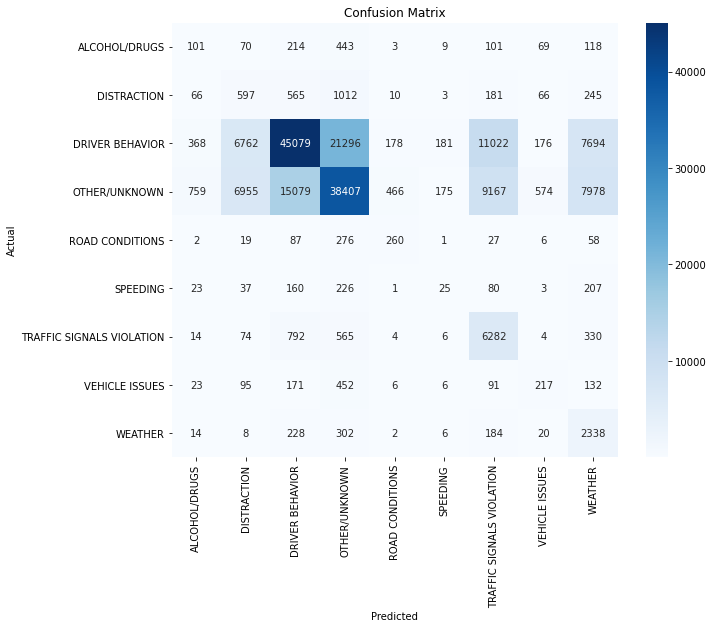

KNN Test Set Performance:
Classification Report:
                            precision    recall  f1-score   support

            ALCOHOL/DRUGS       0.20      0.00      0.00      1128
              DISTRACTION       0.22      0.00      0.00      2745
          DRIVER BEHAVIOR       0.58      0.69      0.63     92756
            OTHER/UNKNOWN       0.55      0.52      0.53     79560
          ROAD CONDITIONS       0.33      0.00      0.00       736
                 SPEEDING       0.00      0.00      0.00       762
TRAFFIC SIGNALS VIOLATION       0.50      0.17      0.25      8071
           VEHICLE ISSUES       0.00      0.00      0.00      1193
                  WEATHER       0.28      0.02      0.04      3102

                 accuracy                           0.56    190053
                macro avg       0.29      0.16      0.16    190053
             weighted avg       0.54      0.56      0.54    190053

Confusion Matrix:
 [[    1     1   505   592     0     0    26     1     2]


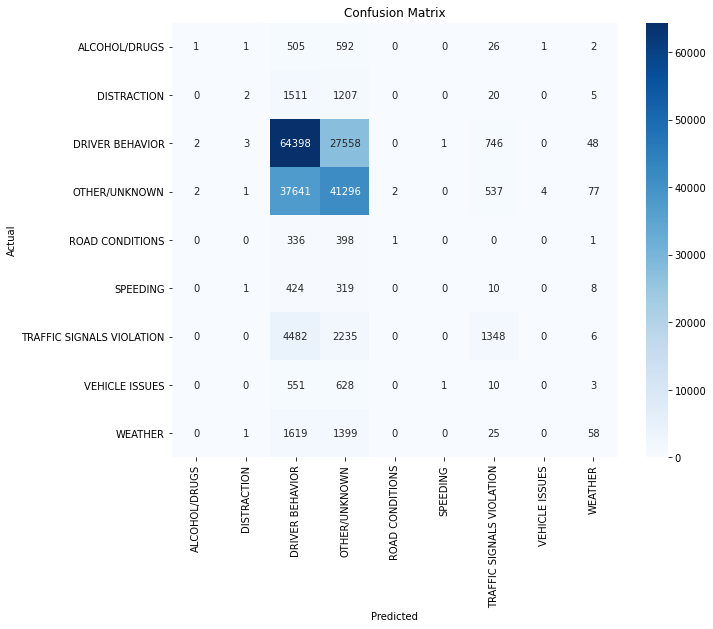

Gradient Boosting Test Set Performance:
Classification Report:
                            precision    recall  f1-score   support

            ALCOHOL/DRUGS       0.06      0.00      0.01      1128
              DISTRACTION       0.68      0.08      0.14      2745
          DRIVER BEHAVIOR       0.63      0.77      0.69     92756
            OTHER/UNKNOWN       0.62      0.55      0.58     79560
          ROAD CONDITIONS       0.34      0.11      0.17       736
                 SPEEDING       0.22      0.05      0.08       762
TRAFFIC SIGNALS VIOLATION       0.69      0.31      0.43      8071
           VEHICLE ISSUES       0.54      0.16      0.25      1193
                  WEATHER       0.32      0.09      0.14      3102

                 accuracy                           0.62    190053
                macro avg       0.46      0.24      0.28    190053
             weighted avg       0.62      0.62      0.61    190053

Confusion Matrix:
 [[    5     5   434   635     3     2    39

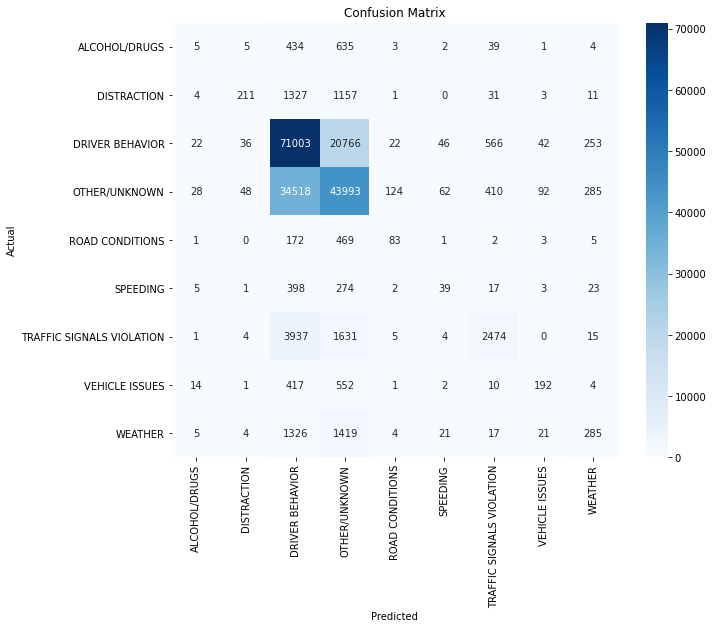

In [312]:
def evaluate_model(grid, X_test, y_test):
    """Evaluates the best model from a GridSearchCV object on the test set."""
    best_model = grid.best_estimator_  # Get the best trained model
    y_pred = best_model.predict(X_test)  # Make predictions on the test set
    print("Classification Report:\n", classification_report(y_test, y_pred))  # Print detailed metrics
    cm = confusion_matrix(y_test, y_pred) #Get the confusion matrix
    print("Confusion Matrix:\n", cm)

    #Visualize the confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)  #Added xticklabels and yticklabels for clarity
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


# Evaluate the best models
print("Random Forest Test Set Performance:")
evaluate_model(rf_grid, X_test, y_test)

print("KNN Test Set Performance:")
evaluate_model(knn_grid, X_test, y_test)

print("Gradient Boosting Test Set Performance:")
evaluate_model(gb_grid, X_test, y_test)

### MODEL EVALUATION

### a. Gradient Boosting Model
### **Strengths:**

#### * Highest overall accuracy and weighted F1-score.

#### * Reasonable performance on DRIVER BEHAVIOR and OTHER/UNKNOWN, which are the most frequent classes.

### **Weaknesses:**

#### * Extremely poor performance on minority classes (ALCOHOL/DRUGS, ROAD CONDITIONS, SPEEDING, WEATHER, VEHICLE ISSUES, DISTRACTION). The precision and recall values are very low, indicating that the model is not able to identify these causes effectively.

#### * The confusion matrix shows that the model often misclassifies these minority classes as DRIVER BEHAVIOR or OTHER/UNKNOWN.

### **Interpretation and Recommendations:**

#### * Gradient Boosting is the best-performing model, but it's still struggling with the class imbalance. Focus on improving its performance on the minority classes.

#### * **Address Class Imbalance: Implement more aggressive class imbalance techniques.**

##### * **Oversampling:** Use SMOTE or ADASYN to oversample the minority classes only in the training set.

#### * **Cost-Sensitive Learning:** Increase the misclassification cost for the minority classes in the Gradient Boosting model.

### B. Random Forest

### **Strengths:**

#### * High recall for WEATHER and TRAFFIC SIGNALS VIOLATION, meaning it captures a good proportion of these events.

### **Weaknesses:**

#### * Extremely low precision for almost all classes. This means that many of the accidents it predicts as having a certain cause are actually due to something else.

#### * The high recall combined with low precision suggests that the model is overgeneralizing and assigning a lot of accidents to these classes, even when they are not the true cause.

#### * Lower F1-score, indicating that it's generally a poor model for this dataset.

### **Interpretation and Recommendations:**

#### * Random Forest is not performing well and is likely overfitting or not capturing the underlying patterns.

#### * **Simplify the Model:** Try reducing the model complexity by decreasing max_depth, increasing min_samples_split, or increasing min_samples_leaf.


### C. KNN

### **Strengths:**

#### * None of significance based on the data.

### **Weaknesses:**

#### * Extremely poor performance across the board, especially for minority classes.

#### * Very low recall values, indicating that it's not able to identify the causes of accidents effectively.

#### * High computation, especially for prediction with no comparable performance to other models.

### **Interpretation and Recommendations:**

#### * KNN is not suitable for this dataset. It's likely being overwhelmed by the high dimensionality and the large number of instances.



## **Recommendations Based on Dominant Contributing Causes (Driver Behavior and Other/Unknown)**

### **1. Enhanced Driver Education and Awareness Campaigns (Targeting Driver Behavior):**


#### * **Revise driver education curricula:** Include more comprehensive training on hazard perception, defensive driving techniques, and the dangers of distracted driving.

#### * **Launch targeted public awareness campaigns:** Focus on the most common improper driving behaviors identified in the data (e.g., failure to yield, following too closely, improper lane changes). Use compelling visuals and messaging to grab drivers' attention.

#### * **Implement mobile app-based interventions:** Develop apps that provide real-time feedback to drivers on their driving behavior (e.g., speed, acceleration, braking, phone usage).


### **2. Investigate and Reduce "Other/Unknown" Causes:**

#### * **Improve data collection protocols:** Provide law enforcement and crash investigators with more comprehensive training and tools to accurately identify and classify the causes of accidents.

#### * **Develop a more granular taxonomy of accident causes:** Break down the "Other/Unknown" category into more specific and meaningful subcategories. Conduct focus groups with investigators to understand the types of situations that are currently classified as "Other/Unknown."

#### * **Implement a quality control process for crash data:** Regularly review crash reports to identify and correct errors or inconsistencies.



## **Recommendations Based on Minority Contributing Causes (Where Improvements Can Have a Targeted Impact)**

#### **i. Targeted Interventions for "Traffic Signals Violation"**

#### * **Increase enforcement:** Deploy law enforcement officers to intersections with a history of traffic signal violations, particularly during peak hours.

#### * **Evaluate signal timing:** Review signal timing patterns to ensure they are appropriate for traffic flow and pedestrian safety. Consider implementing adaptive signal timing systems that adjust to real-time traffic conditions.

#### * **Install advanced warning systems:** Implement flashing yellow arrow signals or countdown timers to provide drivers with more information about the remaining green time.


#### **ii. Targeted interventions for areas with poor road conditions (weather)**

#### **iii. Improve Road Maintenance during Adverse Weather Conditions (Addressing Road Conditions and Weather):**

#### * **Prioritize snow removal and de-icing efforts:** Focus on high-traffic roads, bridges, and overpasses.

#### * **Implement a proactive road salting program:** Apply salt or other de-icing agents before storms to prevent ice from forming.

#### * **Improve drainage systems:** Ensure that drainage systems are properly maintained to prevent water from accumulating on roadways during rain events.
